# Исследование успешности игр на различных платформах в разные вехи развития игровой индустрии

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Представлены данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура _ESRB (Entertainment Software Rating Board)_ — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**:

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    * Данные за 2016 год могут быть неполными.
    
    ***Система ESRB**
        * `EC`	Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.
        * `E`	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
        * `E 10+`	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
        * `T`	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
        * `M`	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.
        * `AO`	Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.
        * `RP`	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.
    
**Цели иследования**:
* найти интересные особенности и зависимости, которые предвосхищают успешность игры
* Составьте портрет пользователя каждого региона
* Выявить предпочтения игроков
* Проверка гипотез:
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    1. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Основные этапы работы**:
* Выполнить предобработку данных
* Изучить в подробностях типы данных, при необходимости переименовать колонки и привести к необходимому типу
* Подчистить набор данных от шумов, аномалий и выбивающихся значений
* Добавить новые колонки для проведения анализа
* Проведсти анализ данных, найти зависимости 
* Вывести вывод на основании анлиза данных, привести примеры некоректности в данных. Дать советы заказчику

## Открытие файла с данными и изучение общей информации. 

Импортирование пакетов, настройка для dataframe и чтение файла

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

pd.set_option('display.max_columns', None)

Прочитаем файл и выведем первые 10 строк набора данных

In [2]:
filepath = '/datasets/games.csv'

try:
    game_data = pd.read_csv(filepath)
except:
    game_data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

print(f'Набор данных имеет {game_data.shape[0]} строк и {game_data.shape[1]}  ')
game_data.head(10)

Набор данных имеет 16715 строк и 11  


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Посмотрим выборочно 10 строк

In [3]:
game_data.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13842,King of Fighters: Maximum Impact Regulation A,PS2,2007.0,Fighting,0.00,0.00,0.04,0.00,NaN,NaN,NaN
2100,Fallout 3,PC,2008.0,Role-Playing,0.02,0.88,0.00,0.08,91.0,7.9,M
11298,NASCAR The Game: Inside Line,PS3,2012.0,Racing,0.07,0.00,0.00,0.01,76.0,4.5,E
2044,Ace Combat 6: Fires of Liberation,X360,2007.0,Simulation,0.69,0.04,0.22,0.06,80.0,7.9,T
13113,Shiren the Wanderer 5 Plus: Fortune Tower and ...,PSV,2015.0,Action,0.01,0.00,0.04,0.00,NaN,NaN,NaN
9691,Hisshou Pachinko*Pachi-Slot Kouryaku Series Vo...,PS2,2008.0,Misc,0.00,0.00,0.12,0.00,NaN,NaN,NaN
10844,National Geographic Challenge!,Wii,2011.0,Misc,0.07,0.02,0.00,0.01,NaN,NaN,NaN
13283,Crime Life: Gang Wars,XB,2005.0,Action,0.04,0.01,0.00,0.00,30.0,3.4,M
9822,NFL QB Club 2001,N64,2000.0,Sports,0.11,0.01,0.00,0.00,NaN,NaN,NaN
12383,Deathrow: Underground Team Combat,XB,2002.0,Sports,0.05,0.01,0.00,0.00,NaN,NaN,NaN


Изучим информацию об этом наборе данных

In [4]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Имеется 6 типов с плавающей точкой и 5 типов объектного типа

Выведем распределение данных в таблице

In [5]:
game_data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
game_data.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Визуализируем эти данные

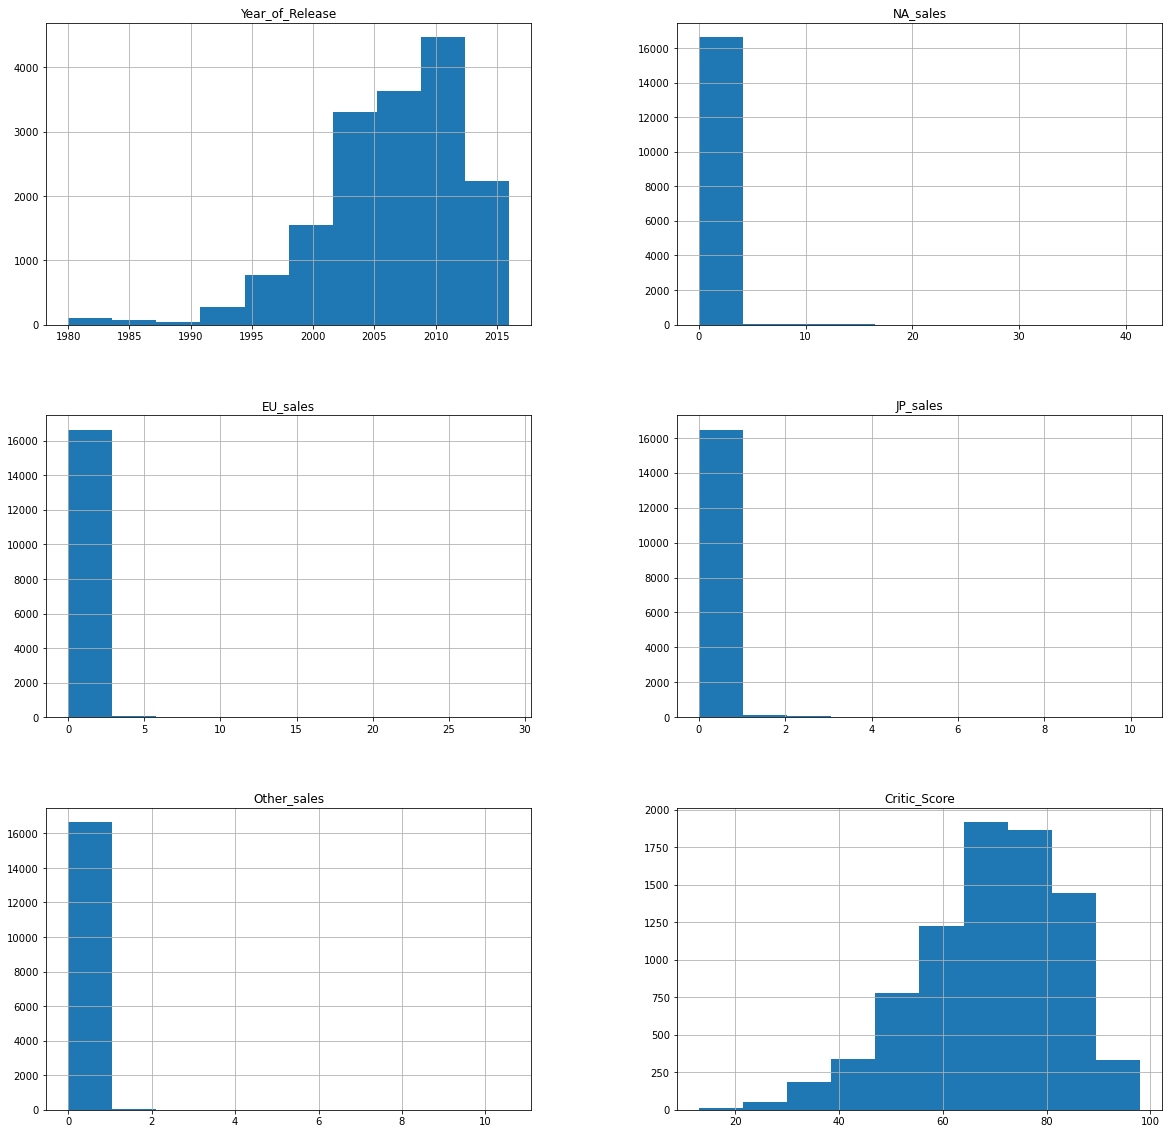

In [7]:
game_data.hist(figsize=(20, 20))
plt.show()

**Выводы:**
* Небольшое количество отсутвующих данных
* Названия колонок необходимо переименовать
* Привести некоторые колонки к нужным типам данных
* Необходимо будет переделать расположение колонок
* Отсортировать набор данных по названию игр

## Предобработка данных

### Приведем названия колонок к логичному названию

In [8]:
# Получить названия колонок
game_data.columns.to_list()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'NA_sales',
 'EU_sales',
 'JP_sales',
 'Other_sales',
 'Critic_Score',
 'User_Score',
 'Rating']

Приведем названия колонок, которые будут отвечать требованиям соглашениям. И заменим ими в датасете.

In [9]:
# Приведение название колонок к нижнему регистру
game_data.columns = game_data.columns.str.lower()

In [10]:
# Переименование колонок 
game_data =game_data.rename({'name': 'title', 'na_sales': 'usa_sales', 'jp_sales': 'jap_sales'}, axis='columns')

In [11]:
game_data.columns.to_list() # Проверка изменений

['title',
 'platform',
 'year_of_release',
 'genre',
 'usa_sales',
 'eu_sales',
 'jap_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

Расположу колонки по важности, что бы легче было ориентироваться по таблице

In [12]:
game_data = game_data[['title','platform','genre', 'usa_sales','eu_sales','jap_sales',
                      'other_sales','user_score','critic_score','rating', 'year_of_release']]

In [13]:
display(game_data.head())

,title,platform,genre,usa_sales,eu_sales,jap_sales,other_sales,user_score,critic_score,rating,year_of_release
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,8,76.0,E,2006.0
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985.0
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,8.3,82.0,E,2008.0
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,8,80.0,E,2009.0
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996.0


Так стало более информативнее 

### Изучение пропущенных значений в столбцах

In [14]:
game_data.isna().sum()

title                 2
platform              0
genre                 2
usa_sales             0
eu_sales              0
jap_sales             0
other_sales           0
user_score         6701
critic_score       8578
rating             6766
year_of_release     269
dtype: int64

Пропуски значений, с виду небольшие. Посмотрим на эти пропуски в процентном отношеении к набору данных

In [15]:
pd.DataFrame(round(game_data.isna().sum() / game_data.shape[0] * 100).sort_values()).style.background_gradient('coolwarm')

,0
title,0.000000
platform,0.000000
genre,0.000000
usa_sales,0.000000
eu_sales,0.000000
jap_sales,0.000000
other_sales,0.000000
year_of_release,2.000000
user_score,40.000000
rating,40.000000


* Есть по 2 пропуска в `title`, `genre` которые не отобразились, в дальнейшем посмотри на них.  
* Больше 50 процентов пропущеных значений в `critic_score` или 8578 ячеек
* По 40% пропущенных значений в колонках `user_score`, `rating`

In [16]:
# Проверим прoпуски в названиях
game_data.loc[game_data.title.isna()]

,title,platform,genre,usa_sales,eu_sales,jap_sales,other_sales,user_score,critic_score,rating,year_of_release
659,NaN,GEN,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,1993.0
14244,NaN,GEN,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,1993.0


Уберем эти 2 строки, так нет возможности понять что это были за игры и этим уберем пропуски в 2 колонках `title`, `genre`

In [17]:
game_data = game_data[~(game_data['title'].isna())]

Посмотрим на уникальные значения в колонке `'year_of_release'`

In [18]:
game_data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [19]:
game_data['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [20]:
#
game_data.loc[game_data['year_of_release'].isna()].head(10)

,title,platform,genre,usa_sales,eu_sales,jap_sales,other_sales,user_score,critic_score,rating,year_of_release
183,Madden NFL 2004,PS2,Sports,4.26,0.26,0.01,0.71,8.5,94.0,E,NaN
377,FIFA Soccer 2004,PS2,Sports,0.59,2.36,0.04,0.51,6.4,84.0,E,NaN
456,LEGO Batman: The Videogame,Wii,Action,1.80,0.97,0.00,0.29,7.9,74.0,E10+,NaN
475,wwe Smackdown vs. Raw 2006,PS2,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,NaN
609,Space Invaders,2600,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,NaN
627,Rock Band,X360,Misc,1.93,0.33,0.00,0.21,8.2,92.0,T,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,Adventure,2.15,0.18,0.00,0.07,tbd,73.0,E,NaN
678,LEGO Indiana Jones: The Original Adventures,Wii,Action,1.51,0.61,0.00,0.21,6.6,78.0,E10+,NaN
719,Call of Duty 3,Wii,Shooter,1.17,0.84,0.00,0.23,6.7,69.0,T,NaN
805,Rock Band,Wii,Misc,1.33,0.56,0.00,0.20,6.3,80.0,T,NaN


В строках названия игр:
* есть игры "Спортивной серии" и заложена идентификация по годам, можно подставить год релиза игры эти цифры, так как такие игры выходят в год проходения такого сезона или годом ранее. 
* Присутствуют версионность (`Call of Duty 3`) в названиях игр.

**Проверим гипотезу что спортивные игры предназначены для большой аудитории и выходят сразу на нескольких платформах, а не исклюзивно для одной.** Также отыщуться совпадения не спортивным играм.

In [21]:
# Соберем отдельно набор без пустых значений по годам
year_not_null = game_data[game_data['year_of_release'].notnull()]

In [22]:
game_data.query('title == "Madden NFL 2004"')

,title,platform,genre,usa_sales,eu_sales,jap_sales,other_sales,user_score,critic_score,rating,year_of_release
183,Madden NFL 2004,PS2,Sports,4.26,0.26,0.01,0.71,8.5,94.0,E,NaN
1881,Madden NFL 2004,XB,Sports,1.02,0.02,0.00,0.05,8.3,92.0,E,2003.0
3889,Madden NFL 2004,GC,Sports,0.40,0.10,0.00,0.01,7.7,94.0,E,2003.0
5708,Madden NFL 2004,GBA,Sports,0.22,0.08,0.00,0.01,6.6,70.0,E,2003.0


In [23]:
# Выведем даные самой популярной игры в наборе `title`
game_data.query('title == "Need for Speed: Most Wanted"')

,title,platform,genre,usa_sales,eu_sales,jap_sales,other_sales,user_score,critic_score,rating,year_of_release
253,Need for Speed: Most Wanted,PS2,Racing,2.03,1.79,0.08,0.47,9.1,82.0,T,2005.0
523,Need for Speed: Most Wanted,PS3,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN,2012.0
1190,Need for Speed: Most Wanted,X360,Racing,0.62,0.78,0.01,0.15,8.5,83.0,T,2012.0
1591,Need for Speed: Most Wanted,X360,Racing,1.00,0.13,0.02,0.10,8.5,83.0,T,2005.0
1998,Need for Speed: Most Wanted,XB,Racing,0.53,0.46,0.00,0.05,8.8,83.0,T,2005.0
2048,Need for Speed: Most Wanted,PSV,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN,2012.0
3581,Need for Speed: Most Wanted,GC,Racing,0.43,0.11,0.00,0.02,9.1,80.0,T,2005.0
5972,Need for Speed: Most Wanted,PC,Racing,0.02,0.23,0.00,0.04,8.5,82.0,T,2005.0
6273,Need for Speed: Most Wanted,WiiU,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN,2013.0
6410,Need for Speed: Most Wanted,DS,Racing,0.24,0.01,0.00,0.02,6.1,45.0,E,2005.0


Гипотеза потвердилась.

Соберем отдельно набор данных с заполнеными значениями по годам
Подставим год, если есть совпадения по названиям игры
Но также видно что очень популярные игры могут периздаваться в разные годы Вывод:
Будет не корректно подставлять значения года выпуска для спортивных игр, потому что у других игр может подствится не правильные значения. Набор данных иммеет всего 2% пропуска данных в этой колоке. Так что удалим строки с пустыми значениями.

In [24]:
game_data = game_data[~(game_data['year_of_release'].isna())]

In [25]:
print('В столбце "year_of_release" осталось {0} пустых ячееки'.format(game_data['year_of_release'].isna().sum()))

В столбце "year_of_release" осталось 0 пустых ячееки


### Колонка `rating`

In [26]:
game_data.rating.value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [27]:
game_data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [28]:
game_data.loc[game_data['rating'].isna()].sample(5)

,title,platform,genre,usa_sales,eu_sales,jap_sales,other_sales,user_score,critic_score,rating,year_of_release
16563,Razor Freestyle Scooter,GBA,Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN,2001.0
12598,Fate/Tiger Colosseum Upper,PSP,Fighting,0.00,0.00,0.06,0.00,NaN,NaN,NaN,2008.0
13225,"Lupin III: Lupin ni wa Shi o, Zenigata ni wa K...",PS2,Adventure,0.00,0.00,0.05,0.00,NaN,NaN,NaN,2007.0
14247,Monster Guardians,GBA,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN,2001.0
12129,"Horrid Henry: The Good, The Bad and The Bugly",3DS,Platform,0.00,0.06,0.00,0.01,NaN,NaN,NaN,2011.0


Предположу что игра выходящая на разных не может иметь разные рейтинги. Воспользуемся решением из предыдущего шага. Будем искать совпадения.

In [29]:
print('В столбце "rating" было {0} пустых ячееки'.format(game_data['rating'].isna().sum()))

В столбце "rating" было 6676 пустых ячееки


In [30]:
# Соберем отдельно набор без пустых значений по годам
rating_not_null = game_data[game_data['rating'].notnull()]

def fillna_rating_realease(row):
    column = 'rating' # Колонка куда буду подставлять значения
    rows = year_not_null[year_not_null['title'] == row['title']]
    if len(rows) > 0:                # Проверить что строка не пустая
        return rows.iloc[0][column]  # Подстановка значения в колонку
    
    return row[column]

game_data['rating'] = game_data.apply(fillna_rating_realease, axis=1)

print('В столбце "rating" осталось {0} пустых ячееки'.format(game_data['rating'].isna().sum()))

В столбце "rating" осталось 6609 пустых ячееки


Нашли таким образом не болшое количество совпадений. Чтобы не терять эти данные заменю эти значения на `"unknown"`

In [31]:
game_data['rating'] = game_data['rating'].fillna(value='unknown')

### Колонка `user_score`

In [33]:
game_data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Оценок много, посмотрим на них с помощью сводной таблицы

In [34]:
game_data['user_score'].value_counts().head()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
Name: user_score, dtype: int64

Оценки пользователей имеют строчный тип, хотя лучше привести к числовому типу.  
Интересно что это за оценка `'tbd'`. Необходимо лучше разобраться с этой оценкой вначале. А затем привести к нужному типу

In [35]:
game_data.query('user_score == "tbd"').sample(10)

,title,platform,genre,usa_sales,eu_sales,jap_sales,other_sales,user_score,critic_score,rating,year_of_release
12693,Rooms: The Main Building,Wii,Adventure,0.05,0.00,0.0,0.00,tbd,60.0,E,2010.0
9509,Borderlands: Double Game Add-On Pack,X360,Shooter,0.10,0.02,0.0,0.01,tbd,NaN,M,2010.0
11899,Goosebumps HorrorLand,PS2,Adventure,0.04,0.03,0.0,0.01,tbd,NaN,E10+,2008.0
7146,Ben 10 Ultimate Alien: Cosmic Destruction,PS2,Platform,0.13,0.06,0.0,0.04,tbd,NaN,E10+,2010.0
16599,Legends of Oz: Dorothy's Return,3DS,Puzzle,0.00,0.01,0.0,0.00,tbd,NaN,E,2014.0
3731,50 Classic Games,DS,Misc,0.50,0.00,0.0,0.04,tbd,NaN,E,2009.0
7619,Treasure World,DS,Simulation,0.18,0.00,0.0,0.01,tbd,68.0,E,2009.0
14005,GoPets: Vacation Island,DS,Simulation,0.03,0.00,0.0,0.00,tbd,NaN,E,2008.0
13908,Outlaw Volleyball Remixed,PS2,Sports,0.02,0.01,0.0,0.00,tbd,57.0,M,2004.0
15364,Atari Flashback Classics: Volume 1,XOne,Misc,0.02,0.00,0.0,0.00,tbd,NaN,E,2016.0


In [36]:
# Проверка оценки tbd и продаж игр в Японии
game_data.query('user_score == "tbd" & jap_sales > 0.1').sort_values('jap_sales', ascending=False)

,title,platform,genre,usa_sales,eu_sales,jap_sales,other_sales,user_score,critic_score,rating,year_of_release
2120,Tamagotchi Connection: Corner Shop 2,DS,Simulation,0.09,0.01,0.86,0.01,tbd,66.0,E,2006.0
4160,Clash of Elementalists,DS,Action,0.00,0.00,0.47,0.00,tbd,34.0,T,2010.0
5012,Tamagotchi Connection: Corner Shop 3,DS,Simulation,0.06,0.00,0.31,0.01,tbd,57.0,E,2007.0
4476,Master of Illusion,DS,Puzzle,0.16,0.00,0.26,0.01,tbd,69.0,E,2006.0
6680,Karaoke Joysound Wii,Wii,Misc,0.00,0.00,0.25,0.00,tbd,NaN,E10+,2008.0
5953,Lupin the 3rd: Treasure of the Sorcerer King,PS2,Adventure,0.02,0.02,0.25,0.01,tbd,67.0,T,2002.0
5354,Classic NES Series: Ice Climber,GBA,Platform,0.10,0.04,0.20,0.01,tbd,66.0,E,2004.0
3849,Swing Away Golf,PS2,Sports,0.17,0.13,0.18,0.04,tbd,78.0,E,2000.0
6369,Pro Evolution Soccer 2013,PSP,Sports,0.00,0.07,0.18,0.03,tbd,NaN,E,2012.0
2671,Personal Trainer: Walking,DS,Sports,0.21,0.32,0.17,0.07,tbd,69.0,E,2008.0


Такая оценка "tbd" на различных платформах, разных жанрах, разлчные года выпуска.
Поиск в интернете привел к 
> **TBD** - аббревиатура от английского *To Be Determined* (будет определено) или *To Be Decided*(будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.


Как видно что такая оценка возможна для отдельных регионов, в данном случае для Японии. Основные продажи для игр произошли в Японии, в других регионах продажи были минимальны. Возможно игры преднадназначенные для своих регионов не оценивается в некоторых случаях  Американским рейтинговым агентством.

In [37]:
print('В столбце "user_score" {0} пустых ячейки и 2424 ячейки со оценкой "tbd"'\
      .format(game_data['user_score'].isna().sum()))

В столбце "user_score" 6605 пустых ячейки и 2424 ячейки со оценкой "tbd"


Заменю все значения с оценкой "tbd" к `"NaN"`чтобы в дальнейшем можно было привести эту колонку к числовому значению.

In [38]:
tbd = game_data['user_score'] != 'tbd'
game_data['user_score'].where(tbd, np.nan, inplace=True)

### Колонка `critic_score`

In [39]:
game_data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94., 95.,
       96., 97., 98., nan])

Отрицательных значений нету. Оценки от 13 до 98.  
Посмотрим на строки с отсутвующими значениями

In [41]:
(
    game_data.groupby('critic_score').agg({'critic_score':'count'})
    .rename(columns={'critic_score':'count'})
    .sort_values(by='count', ascending=False).head(10)
)

,count
critic_score,
70.0,252
71.0,248
75.0,240
80.0,235
73.0,234
78.0,233
76.0,228
74.0,223
72.0,223


In [42]:
game_data.loc[game_data['critic_score'].isna()].sort_values('jap_sales', ascending=False).head(10)

,title,platform,genre,usa_sales,eu_sales,jap_sales,other_sales,user_score,critic_score,rating,year_of_release
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,1996.0
12,Pokemon Gold/Pokemon Silver,GB,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,unknown,1999.0
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,1985.0
20,Pokemon Diamond/Pokemon Pearl,DS,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,unknown,2006.0
27,Pokemon Black/Pokemon White,DS,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,unknown,2010.0
25,Pokemon Ruby/Pokemon Sapphire,GBA,Role-Playing,6.06,3.90,5.38,0.50,NaN,NaN,unknown,2002.0
215,Monster Hunter Freedom 3,PSP,Role-Playing,0.00,0.00,4.87,0.00,NaN,NaN,unknown,2010.0
33,Pokemon X/Pokemon Y,3DS,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,2013.0
5,Tetris,GB,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,1989.0
21,Super Mario Land,GB,Platform,10.83,2.71,4.18,0.42,NaN,NaN,unknown,1989.0


* В колонках `user_score` `critic_score` не получится заменить пустые значения по совпадающим значениям с других платформ, так как оценки очень сильно могут отличаться. 
* Набор данных был отсортирован по продажам в Японии. Из названий мы понимаем что игры в основном произведены и предназначены для Японии, годы выпусков игр от 1985-20013. Отсутсвие значений в `user_score` `critic_score` наталкивает на мысль что оценки критиков и игроков проставляет  Американское рейтинговое агентство для игр выпущенных для регоинов США и Европы.

**Идея на будующее: посмотреть среднюю оценку у игры вышедшей на различных платформах. Может быть есть смысл заменить пропущеное значение у этой игры на среднее?**

Приведем колонки  `'year_of_release'` типу Int, а колонку `'user_score'` к типу `float`

In [45]:
game_data['user_score'] = game_data['user_score'].astype('float')

# Приведение года к целочисленому значению
game_data['year_of_release'] = game_data['year_of_release'].astype('int')

### Региональные продажи
Посчитаем суммарные продажи во всех регионах и запишкм их в отдельный столбец.

In [46]:
list_region_sales = ['usa_sales', 'eu_sales', 'jap_sales', 'other_sales']
game_data['total_sales'] = game_data.loc[:, list_region_sales].sum(axis=1)

### Устранение неявных дубликатов

In [47]:
game_data.duplicated().sum()

0

Дубликаты не найдены

In [48]:
# Поиск дубликатов по колонкам 'title', 'platform', 'year_of_release'
game_data.duplicated(['title', 'platform', 'year_of_release']).sum()

1

In [49]:
# Удалим дубликат
game_data = game_data.drop_duplicates(subset=['title', 'platform', 'year_of_release'])

### Выводы

In [50]:
pd.DataFrame(round(game_data.isna().sum() / game_data.shape[0] * 100).sort_values()).style.background_gradient('coolwarm')

,0
title,0.000000
platform,0.000000
genre,0.000000
usa_sales,0.000000
eu_sales,0.000000
jap_sales,0.000000
other_sales,0.000000
rating,0.000000
year_of_release,0.000000
total_sales,0.000000


* Изучили все колонки набора данных
* Заменили отсутвующие значения года выхода и рейтинга игры.
* Не удалось найти зависимость от чего зависит оценка игры пользователями и критиками. Возможно стоит в дальнейшем будет просмотреть оценки одной игры на разных платформах.
* Из-за категории оценки "tbd" увеличилось количество ячеек с пропущеным значением. Доля таких значений теперь превышает 55% от генеральной совокупности.
* Скорее всего данный рейтинг составлен `Американским рейтинговым агентством` и он не учитывает рейтинги, оценки игроков и критиков для игр произыеденных в других регионах и предназначенных для локального региона продаж, которые в дальнейшем могут попасть на мировые рынки. Хорошо было бы учитывать оценки критиков и игроков других рейтинговых агенств.
* Привели колонки `'critic_score'`, `'year_of_release'` и `'user_score'` к неооходимому типу данных.
* В отдельной колонке вывели итоговые продажи игры.

## Проведение исследовательского анализа данных

Визуализируем набор данных

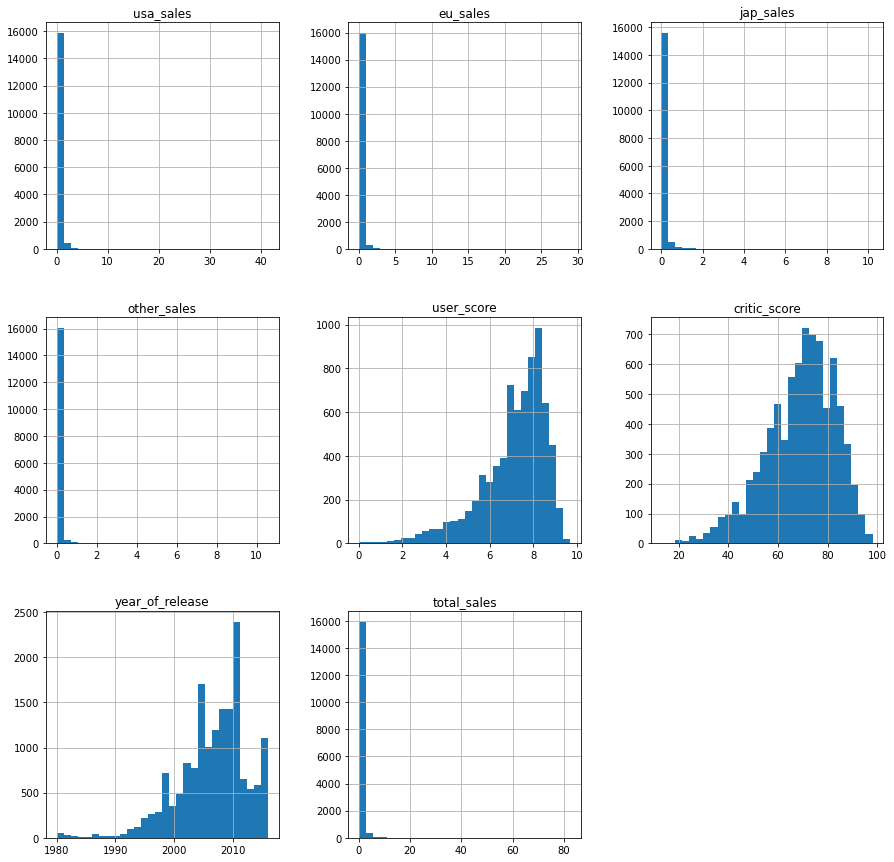

In [51]:
game_data.hist(figsize=(15,15), bins=30)
plt.show()

In [52]:
game_data.describe()

,usa_sales,eu_sales,jap_sales,other_sales,user_score,critic_score,year_of_release,total_sales
count,16443.000000,16443.000000,16443.000000,16443.000000,7462.000000,7982.000000,16443.000000,16443.000000
mean,0.264028,0.145939,0.078492,0.047597,7.126548,68.992608,2006.485921,0.536055
std,0.818400,0.506731,0.311109,0.188011,1.499429,13.920049,5.875546,1.558828
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1980.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,6.400000,60.000000,2003.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,7.500000,71.000000,2007.000000,0.170000
75%,0.240000,0.110000,0.040000,0.030000,8.200000,79.000000,2010.000000,0.470000
max,41.360000,28.960000,10.220000,10.570000,9.700000,98.000000,2016.000000,82.540000


In [53]:
game_data.describe(include='object')

,title,platform,genre,rating
count,16443,16443,16443,16443
unique,11426,31,12,8
top,Need for Speed: Most Wanted,PS2,Action,unknown
freq,12,2127,3307,6609


* Игроки чаще оценивают игры от 6.4 до 9.7. Но чаще ставят оценку 8
* Критики более критичны в своих оценках. Оценки в диапозоне 13-98 баллов. Н графике видно норамальное распределение даннысх с пиком в 70 баллов.
* В некоторые годы был бум по выпуску игр. Видны резкие скачки по количеству выпускаемых игр, и резким падением в последующие годы.

### Анализ количества выпускаемых игр по годам

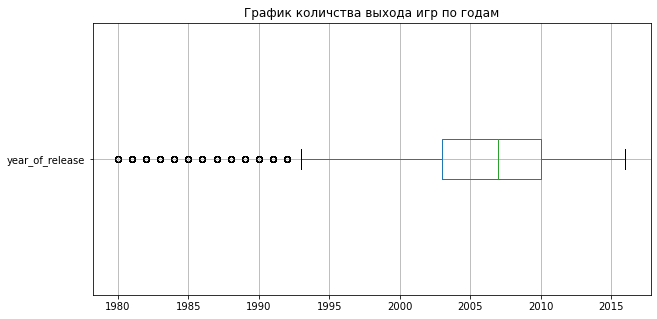

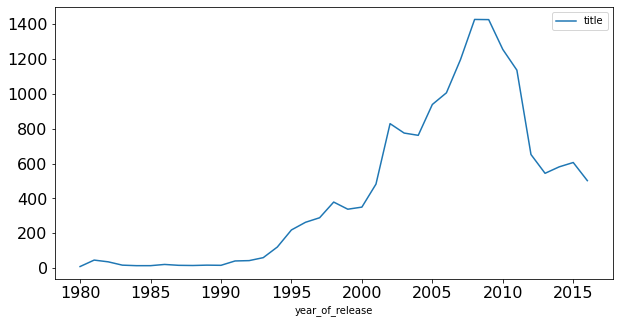

In [54]:
fontsize = 16
game_data.boxplot(column='year_of_release', vert=False, figsize=(10, 5))
plt.title('График количства выхода игр по годам')

games_per_year = (
    game_data[['title', 'year_of_release']]
    .pivot_table(index='year_of_release', values='title', aggfunc='count')
    .sort_values('year_of_release', ascending=False)
)

games_per_year.plot(figsize=(10, 5))
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.show()

* Как видно бурный рост начинается в 1993. Начало левого уса коробки с усами.
* "Золотой век" по количеству выпущенных копий игр пришелся с 2003-2010 год.
* Самое болшое количеству выпущенных копий пришлось на 2008-2009 год в среднем вышло 1400 игр в год.
* После 2010 года идет резкое снижение выхода вплоть 2014 года,
* В 2015 выходит больше игр по сравнению с 2014, 2016 год неполный. Возможно это показетель тренда на увеличение количества выхода игр после долгого падения. Возможно период с 2010 по 2014 был затяжной кризис в игровой индустрии.

### Анализ игр по платформам

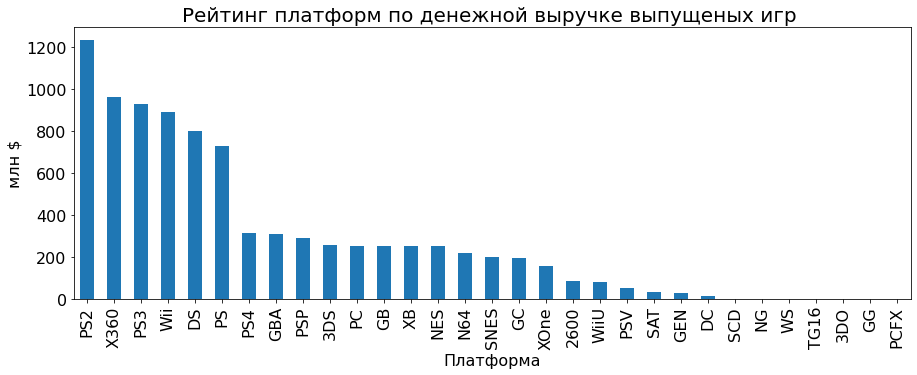

In [55]:
list_sales_of_platform =(
    game_data.pivot_table(index='platform', values='total_sales',
    aggfunc=sum).sort_values('total_sales', ascending=False)
)

list_sales_of_platform.plot(kind='bar', figsize=(15, 5), legend=False)

plt.title('Рейтинг платформ по денежной выручке выпущеных игр ', fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Платформа', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)
plt.show()

Посмотрим на 10 лучших платформ по выручке

In [56]:
list_top10 = list_sales_of_platform.head(10)
list_top10

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [57]:
list_top10['total_sales'].head(6).sum()

5547.67

In [58]:
list_top10['total_sales'].tail(4).sum()

1174.36

Выходит интересный факт самая долгоживущая платформа `PC`, существующая и по сей день, зарботала в 4 раза меньше чем платформа `PS2`. И немного меньше `PS4`которая только недавно вышла рынок консолей. На графике видно что первые 6 платформ заработали существенную денежную выручку по сравнению с оставшимися 4 платформами.
Так в сумме `6 первых` платформ заработали в 5 раз больше, оставшися в `топ 10`

**Выходит игры для консолей:**
* либо стоят намного дороже чем игры для `PC`
* либо спрос на такие игры высокий, как на "горячие пирожки"
* либо количество выпускаемых тайтлов намного больше чем на `PC`

Посмотрим на жизненый цикл платформ

In [59]:
# Функция принимает 2 параметра. name - колонка по которой идет подсчет продаж
# df - передаваемый датафрейм. Возвращает сводную таблицу по платформам выпускаемых игр
# к их годовой выручке, отсортированной по годам
def yearly_total_sales_by_platform(name, df):
    return (
        df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

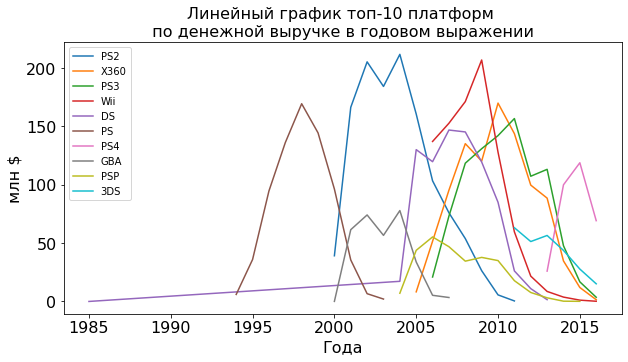

In [60]:
for platform in list(list_top10.index):
    yearly_total_sales_by_platform(platform, game_data)['total_sales'].plot(figsize=(10, 5), label=platform)
    plt.legend()
    
# Декорация графика
plt.title('Линейный график топ-10 платформ \n по денежной выручке в годовом выражении ', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Года', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)
plt.show()

**Выводы**
* Глобальный всплеск по выручке начинается с 1993 с появления платформы `PS`
* Жизненый цикл консольных платформ составляет в среднем 9 лет
* Выручка на платформе `PC` в 10 раз меньше в годовом выражениичем чем у консолей, зато самая долгоживущая платформа. И на врядли когда-нубудь уйдет с рынка.
* Есть промежутки в годах когда существует платформа старой версии и вшедшая новая версия платформы(`PS`, `PS2`, `PS3`, `PS4`). И если сложить в этом промежутке годовую выручку двух платформ, то это сопастовимо с пиковой годовой выручкой, когда на рынке присутвует одна платформа.
* В период 2008-2014 год возможно ушли с рынка продаж игр несколько платформ, отсюда вытекает резкое падение количество выхода игр.

In [61]:
game_data.describe()

,usa_sales,eu_sales,jap_sales,other_sales,user_score,critic_score,year_of_release,total_sales
count,16443.000000,16443.000000,16443.000000,16443.000000,7462.000000,7982.000000,16443.000000,16443.000000
mean,0.264028,0.145939,0.078492,0.047597,7.126548,68.992608,2006.485921,0.536055
std,0.818400,0.506731,0.311109,0.188011,1.499429,13.920049,5.875546,1.558828
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1980.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,6.400000,60.000000,2003.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,7.500000,71.000000,2007.000000,0.170000
75%,0.240000,0.110000,0.040000,0.030000,8.200000,79.000000,2010.000000,0.470000
max,41.360000,28.960000,10.220000,10.570000,9.700000,98.000000,2016.000000,82.540000


In [62]:
# Проверк аномального хвоста для "DS"
game_data.query('platform == "DS" & year_of_release < 2004')

,title,platform,genre,usa_sales,eu_sales,jap_sales,other_sales,user_score,critic_score,rating,year_of_release,total_sales
15957,Strongest Tokyo University Shogi DS,DS,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,1985,0.02


In [63]:
# Удалим хвост
game_data = game_data.drop(game_data.query('platform == "DS" & year_of_release < 2004').index)

### Строим прогнозы на будущее
Проанализируем актуальный период. Игровой рынок быстро меняющися, срок жизни платформы относительно по годам очень короткий. Возьмем период в половину жизни игровой платформы - 4.5 года. Набор не полный (2016 год не весь). берем период с 2012 года. Скорее всего в этом промежутке мы увидим уходящие платформы и тех кто только забирается на игровой Олимп.
Это нам поможет построить прогноз на 2017 год.

In [64]:
actual_years_df = game_data.query('year_of_release >= 2012 & year_of_release <= 2016').reset_index(drop=True)
actual_years_df

,title,platform,genre,usa_sales,eu_sales,jap_sales,other_sales,user_score,critic_score,rating,year_of_release,total_sales
0,Grand Theft Auto V,PS3,Action,7.02,9.09,0.98,3.96,8.2,97.0,M,2013,21.05
1,Grand Theft Auto V,X360,Action,9.66,5.14,0.06,1.41,8.1,97.0,M,2013,16.27
2,Call of Duty: Black Ops 3,PS4,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,2015,14.63
3,Pokemon X/Pokemon Y,3DS,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,2013,14.60
4,Call of Duty: Black Ops II,PS3,Shooter,4.99,5.73,0.65,2.42,5.3,83.0,M,2012,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2880,Strawberry Nauts,PSV,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,2016,0.01
2881,Aiyoku no Eustia,PSV,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,2014,0.01
2882,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,2016,0.01
2883,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,2016,0.01


За это период вышла большая часть игр нашего набора данных

In [65]:
# конверсия актуального перида к генеральной совокупности
actual_years_df.shape[0]/ game_data.shape[0] * 100

17.546527186473664

За это 4-ёх летний период вышло 2885 игр или 17,5% от общего набора данных.

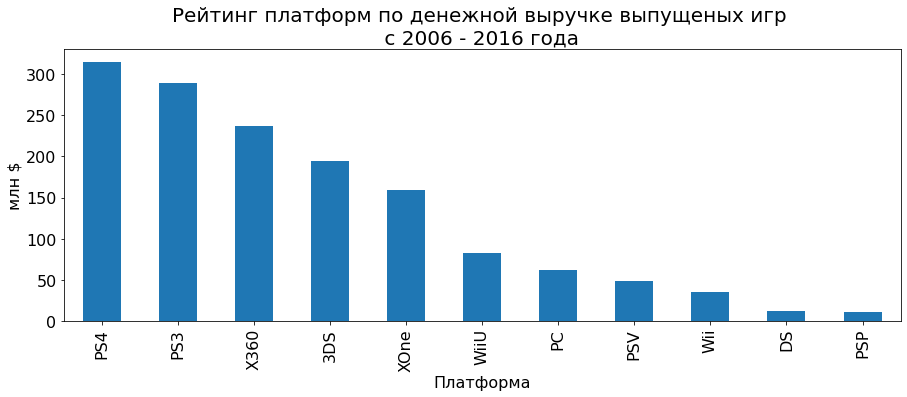

In [66]:
list_actual_sales_of_platform =(
    actual_years_df.pivot_table(index='platform', values='total_sales',
    aggfunc=sum).sort_values('total_sales', ascending=False)
)

list_actual_sales_of_platform.plot(kind='bar', figsize=(15, 5), legend=False)

plt.title('Рейтинг платформ по денежной выручке выпущеных игр \n с 2006 - 2016 года ', fontsize=20)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Платформа', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)
plt.show()

**Вывод**
Пятерка лидеров по выручке формирует равномерную лесенку на понижение по доходам, после следует более резкое падение по доходам. Лидером является новичок этого рынка `PS4`, `XOne` - замыкает пятерку лидеров.

Проанализируем этот период кто в настоящий момент времени, на котором закнчивается набор данных, будет лидером на рынке или есть и останется. Построим для каждой платформы график продаж чтобы увидеть кто из них уходит с рынка, находиться на пике продаж, или только набирает обороты.

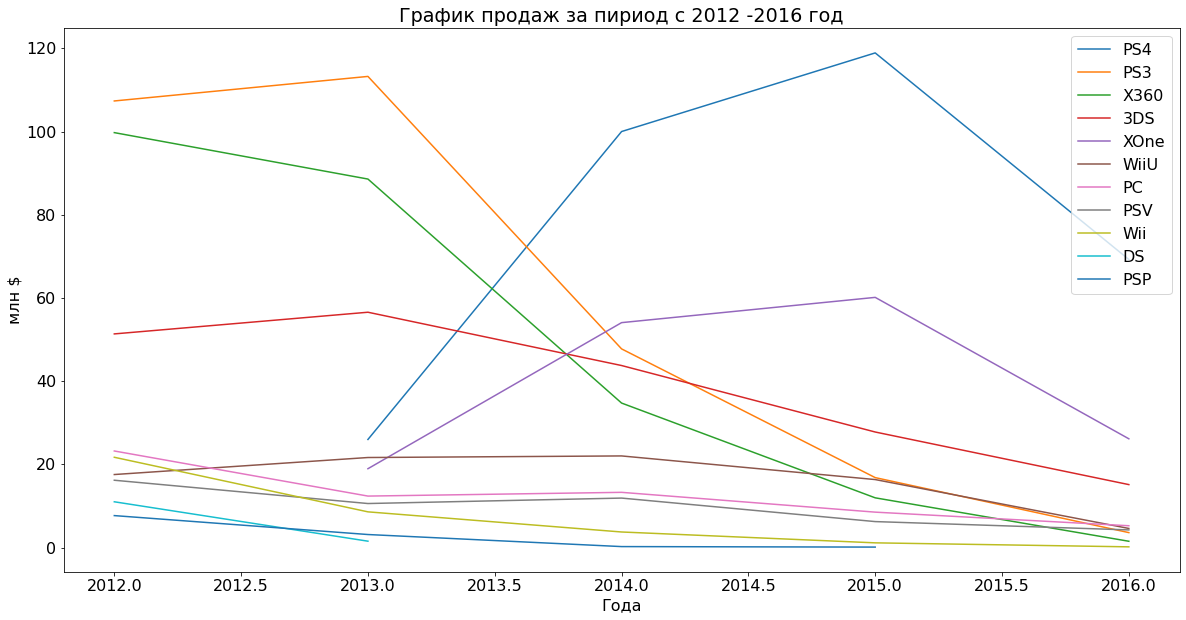

In [67]:
for platform in list(list_actual_sales_of_platform.index):
    yearly_total_sales_by_platform(platform, actual_years_df)['total_sales'].plot(figsize=(20, 10), label=platform)
    plt.legend()
    
# Декорация графика
plt.title('График продаж за пириод с 2012 -2016 год', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Года', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

Уменьшим до 5 платформ актуальных на 2015 год по продажам.

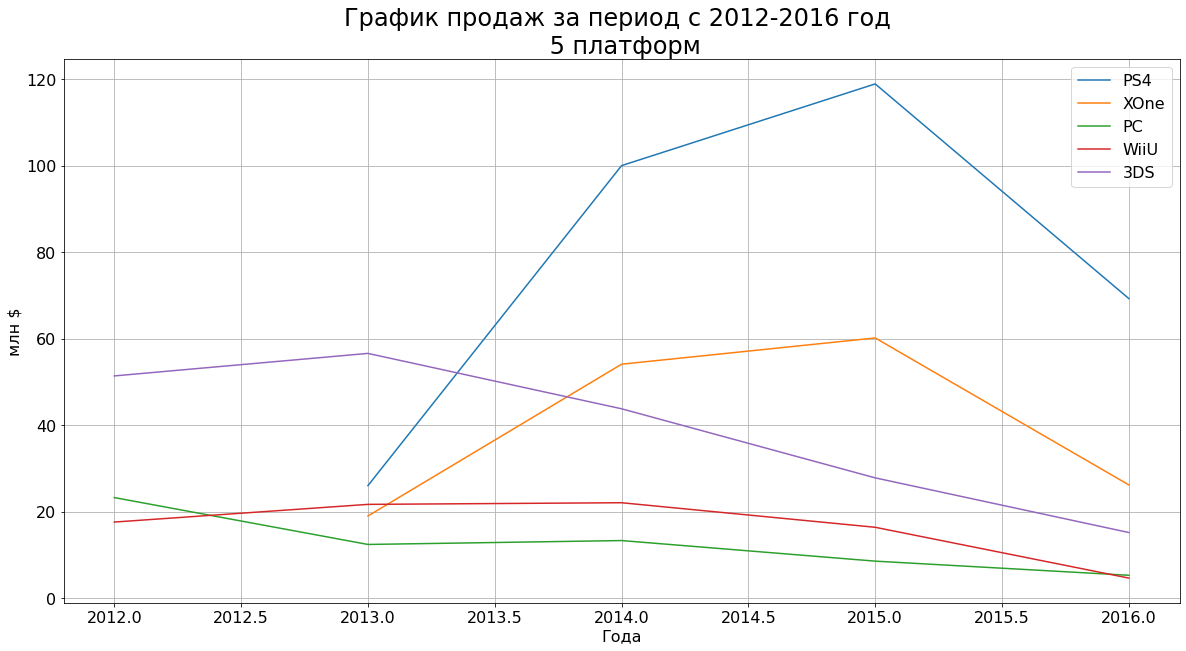

In [68]:
list_top5_platform = ['PS4', 'XOne', 'PC','WiiU', '3DS']
for platform in list(list_top5_platform):
    yearly_total_sales_by_platform(platform, actual_years_df)['total_sales'].plot(figsize=(20, 10), label=platform, grid=True)
    plt.legend()
    
# Декорация графика
plt.title('График продаж за период с 2012-2016 год \n 5 платформ', fontsize=fontsize*1.5)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Года', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

**Вывод**
* Начиная с 2013 идет рост выручку у платформ `PS4` и `XOne`, и с их появлением начала падать выручка у `3DS`
* Все остальные платформ выручка к 2016 году упала, и врядли поднимется

По завершению 2015 года:
* 1 место `PS4` - более 110 млн $  

* 2 место `XOne` - 60 млн $

* Вечно живой `PC` - 10 млн $  
* Жизненый цикл `WiiU`, `3DS` скорее всего всего завершается, судя по временому отрезку еще годик или 2 они уйдут с рынка продаж игр.

### Анализ лидеров продаж
Проанализуруем каждую из этих платформ более подробно. Посмотрим сколько приносят игры в среднем и их мединное значение по итоговой выручке.

In [69]:
# actual_years_df['year_of_release'] = pd.to_datetime(actual_years_df['year_of_release'], format='%Y')
ps4 = actual_years_df.query('platform == "PS4"').reset_index()
x_one = actual_years_df.query('platform == "XOne"').reset_index()
pc = actual_years_df.query('platform == "PC"').reset_index()
df_top3_platf = actual_years_df.query('platform == "PS4" or platform == "XOne" or platform == "PC"').reset_index(drop=True)

group_platform_mean_sales = df_top3_platf.groupby('platform').agg({'total_sales':['mean','median']})
group_platform_mean_sales.style.background_gradient('coolwarm')

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64


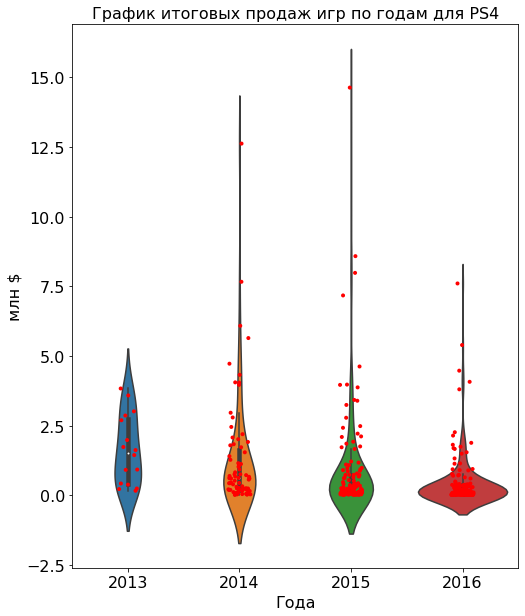

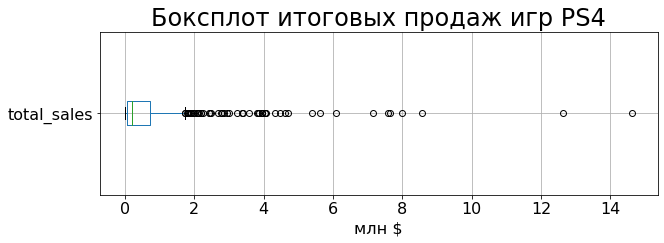

In [70]:
print(ps4['total_sales'].describe())

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(8, 10))

# violint
ax = sns.violinplot(x='year_of_release', y='total_sales', data=ps4, ax=ax,
                    notch=True, showcaps=False,
                    flierprops={"marker": "x"},
                    medianprops={"color": "coral"})
# add stripplot
ax = sns.stripplot(x='year_of_release', y='total_sales', data=ps4, color='red', jitter=1, size=4)

# Декорация графика
plt.title('График итоговых продаж игр по годам для PS4' , fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Года', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)
plt.show()

ps4.boxplot('total_sales', vert=False, figsize=(10, 3))
plt.title('Боксплот итоговых продаж игр PS4' , fontsize=fontsize*1.5)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('млн $', fontsize=fontsize)
plt.show()

**PS4:**
* Средние значения по итоговым продажам игр составляет `800тыс$`
* Медианные значения не так красочно для игр всего лишь `200тыс$` за игру 
* В основном игры приносят выручку от `60тыс - 730тыс.$` 
* Количество выпущеных игр - `390`, за 3 года

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64


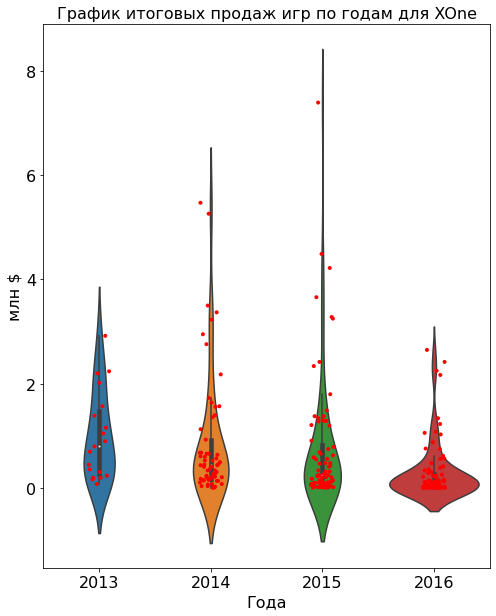

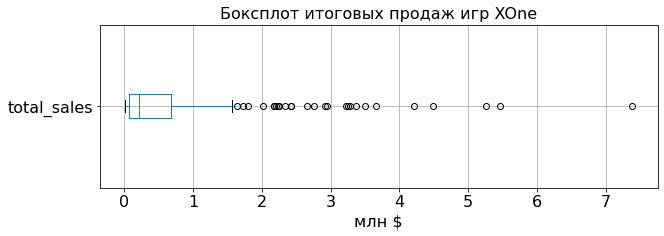

In [71]:
print(x_one['total_sales'].describe())

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(8, 10))

# violint
ax = sns.violinplot(x='year_of_release', y='total_sales', data=x_one, ax=ax,
                    notch=True, showcaps=False,
                    flierprops={"marker": "x"},
                    medianprops={"color": "coral"})
# add stripplot
ax = sns.stripplot(x='year_of_release', y='total_sales', data=x_one, color='red', jitter=1, size=4)

# Декорация графика
plt.title('График итоговых продаж игр по годам для XOne' , fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Года', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)
plt.show()

x_one.boxplot('total_sales', vert=False, figsize=(10, 3))
plt.title('Боксплот итоговых продаж игр XOne' , fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('млн $', fontsize=fontsize)
plt.show()

**XOne:**
* Средние значения по итоговым продажам игр составляет `647тыс$`
* Медианные значения приносят болше чем у `PS4` и составляют `220тыс$` за игру 
* В основном игры приносят выручку от `60тыс - 687тыс.$`
* Количество выпущеных игр - `246`, за 3 года, что меньше на 140 игр по сравнеию с `PS4`

count    250.00000
mean       0.25060
std        0.49464
min        0.01000
25%        0.03000
50%        0.08000
75%        0.24000
max        5.14000
Name: total_sales, dtype: float64


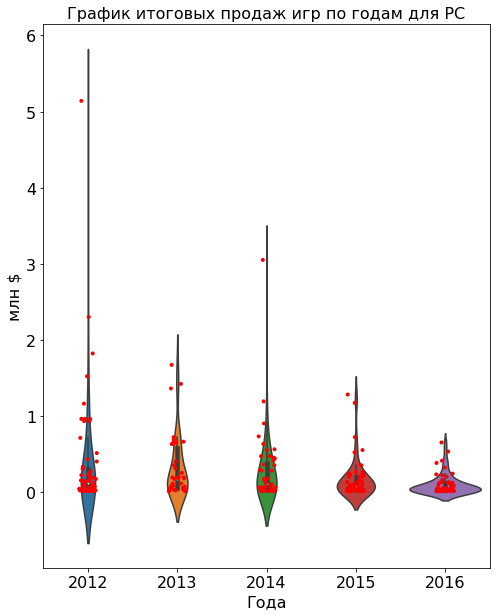

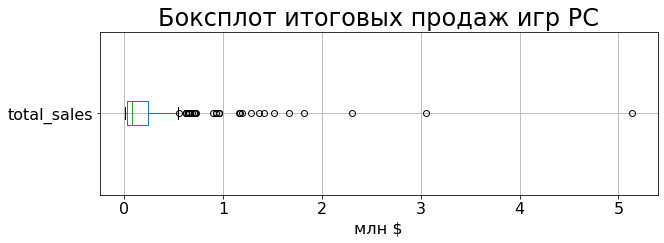

In [72]:
print(pc['total_sales'].describe())

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(8, 10))

# violint
ax = sns.violinplot(x='year_of_release', y='total_sales', data=pc, ax=ax,
                    notch=True, showcaps=False,
                    flierprops={"marker": "x"},
                    medianprops={"color": "coral"})
# add stripplot
ax = sns.stripplot(x='year_of_release', y='total_sales', data=pc, color='red', jitter=1, size=4)

# Декорация графика
plt.title('График итоговых продаж игр по годам для PC' , fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Года', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)
plt.show()

pc.boxplot('total_sales', vert=False, figsize=(10, 3))
plt.title('Боксплот итоговых продаж игр PC' , fontsize=fontsize*1.5)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('млн $', fontsize=fontsize)
plt.show()

**PC:**
* Средние значения по итоговым продажам игр составляет `250тыс$`
* Медианные значения составляют `80тыс$` за игру 
* В основном игры приносят выручку от `30тыс - 240тыс.$`
* Количество выпущеных игр - `250`

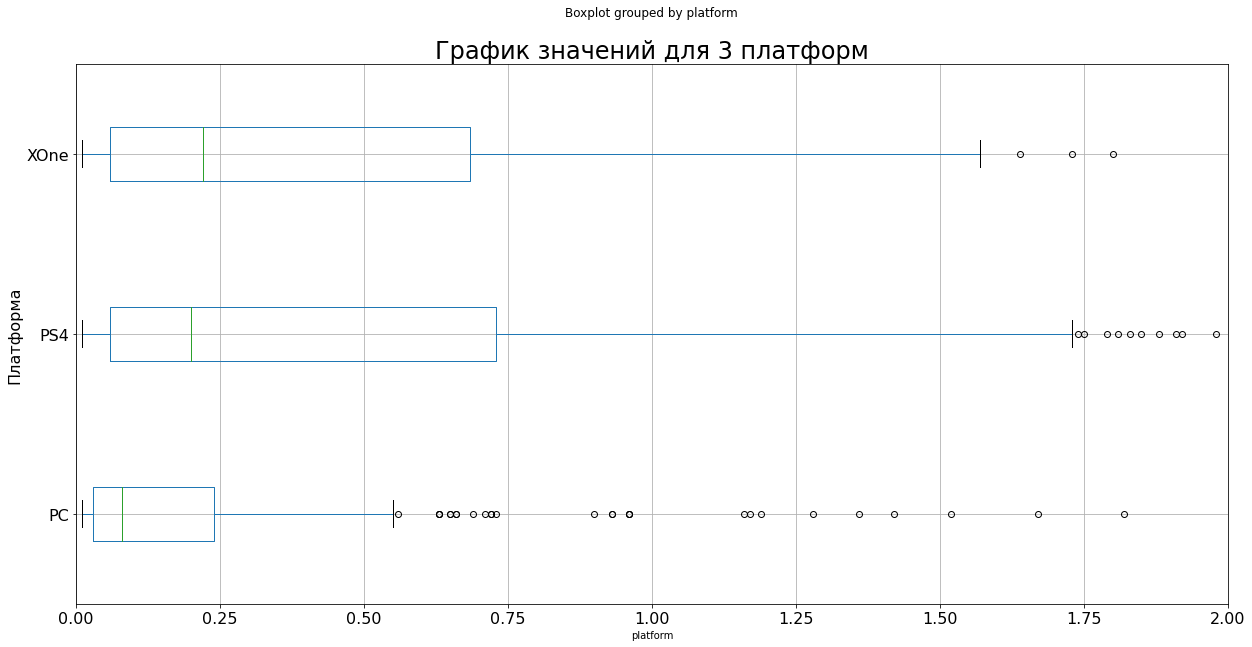

In [73]:
(
    actual_years_df
        .query('platform == "PS4" | platform == "PC" | platform == "XOne"')
        .boxplot('total_sales', by='platform', vert=False, figsize=(20, 10))
    
   
)
plt.title("График значений для 3 платформ", fontsize=fontsize*1.5)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylabel('Платформа', fontsize=fontsize)
plt.xlim([0, 2])
plt.show()

**Выводы**
* Консольные игры приносят больший доход по сравнению с играми для компьютеров, в несколько раз
* Консоли `XOne` и `PS4` только приближитаются к середине своего жизненого цикла, так что скорее всего 2016-2017 года должны быть пиковыми годами по их годовой выручке
* Если судить по графикам и жизненому опыту платформа `PC` считается самой массовой платформой по количеству в мире. И цены на игры для нее в несколько раз ниже чем для консолей. Скорее всего выручка для этой платформы останется на том же уровне в 2016 и в 2017 годах.

### Расмотрение платформ в разрезе оценок пользоватей и критиков 

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [74]:
# общая корреляция по 3 платформам
score_df_for_corr = df_top3_platf[[
    'title', 'platform', 'user_score', 'critic_score','total_sales'
]]

score_df_for_corr.corr().style.background_gradient('coolwarm')

,user_score,critic_score,total_sales
user_score,1.000000,0.472140,-0.029451
critic_score,0.472140,1.000000,0.321717
total_sales,-0.029451,0.321717,1.000000


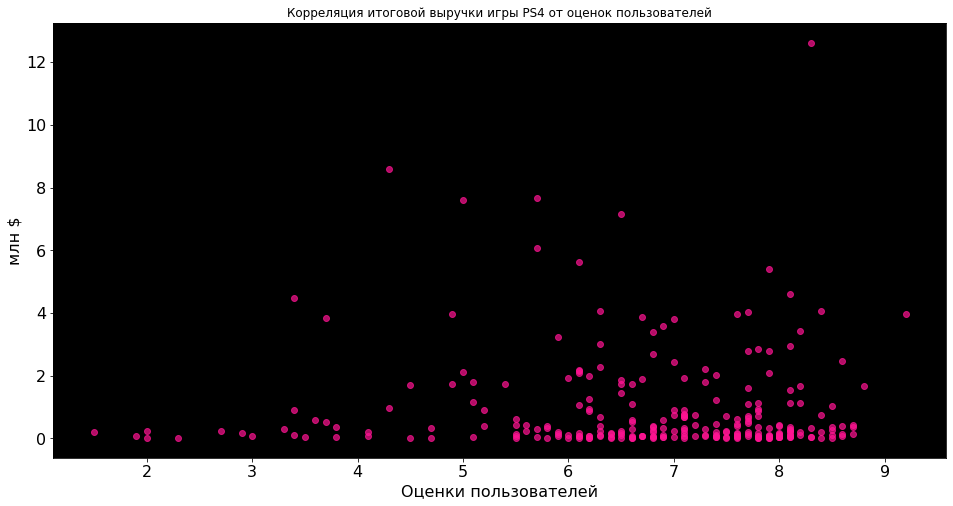

Корреляция составляет: -0.03195711020455646


In [75]:
x =  ps4['user_score']   #  x - координаты точек
y =  ps4['total_sales']    #  y - координаты точек
fig, ax = plt.subplots()

ax.scatter(x, y,
           c = 'deeppink', alpha=0.7)    #  цвет точек

ax.set_facecolor('black')     #  цвет области Axes
ax.set_title('Корреляция итоговой выручки игры PS4 от оценок пользователей')     #  заголовок для Axes

fig.set_figwidth(16)     #  ширина и
fig.set_figheight(8)    #  высота "Figure"

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Оценки пользователей', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)

plt.show()

print('Корреляция составляет:', ps4['user_score'].corr(ps4['total_sales']))

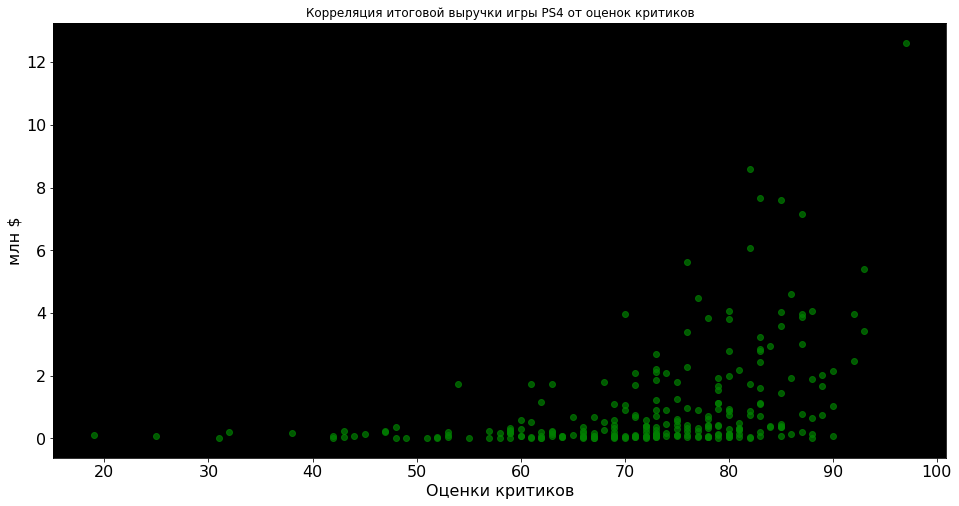

Корреляция составляет: 0.4065679020617814


In [76]:
x =  ps4['critic_score']   
y =  ps4['total_sales']    
fig, ax = plt.subplots()

ax.scatter(x, y, c = 'green', alpha=0.7)

ax.set_facecolor('black')   
ax.set_title('Корреляция итоговой выручки игры PS4 от оценок критиков') 

fig.set_figwidth(16)    
fig.set_figheight(8)    

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Оценки критиков', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)

plt.show()

print('Корреляция составляет:', ps4['critic_score'].corr(ps4['total_sales']))

Уберем в наборах данных выбросы по годовым выручкам, оставим толко с 1 по 3 квартиль, чтобы рассмотреть основнное количество игр.

In [77]:
temp_df = ps4[(ps4['total_sales'] >= 0.6) & (ps4['total_sales'] <= 0.73)]
print("Без выбросов в итоговых продажах")   
print('Корреляция оценок пользователей составляет:{0:.3f}'.format(temp_df['user_score'].corr(temp_df['total_sales'])))
print('Корреляция оценок критиков составляет {0:.3f}:'.format(temp_df['critic_score'].corr(temp_df['total_sales'])))

Без выбросов в итоговых продажах
Корреляция оценок пользователей составляет:0.476
Корреляция оценок критиков составляет 0.291:


**Итоговая выручка** от игры на платформе `PS4` больше коррелирует от того как примут и оценят игру критики, чем оценка пользователей.
* Но если убрать игры с выбросами по годовым выручкам, связь от оценок игроков и критиков сильно зависеть итоговая выручка у игры. 

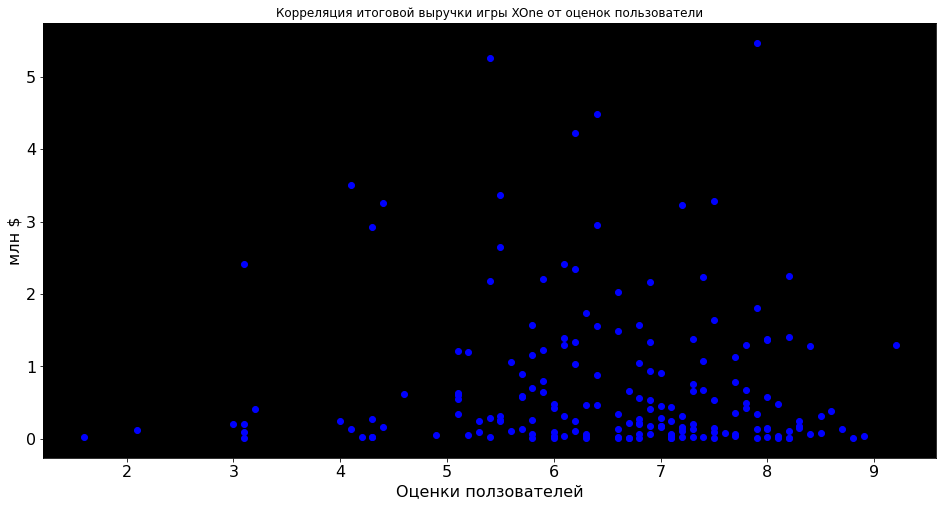

Корреляция составляет: -0.06892505328279418


In [78]:
x =  x_one['user_score']   
y =  x_one['total_sales']    
fig, ax = plt.subplots()

ax.scatter(x, y, c = 'blue')

ax.set_facecolor('black')   
ax.set_title('Корреляция итоговой выручки игры XOne от оценок пользователи') 

fig.set_figwidth(16)    
fig.set_figheight(8)    

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Оценки ползователей', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)

plt.show()

print('Корреляция составляет:', x_one['user_score'].corr(x_one['total_sales']))

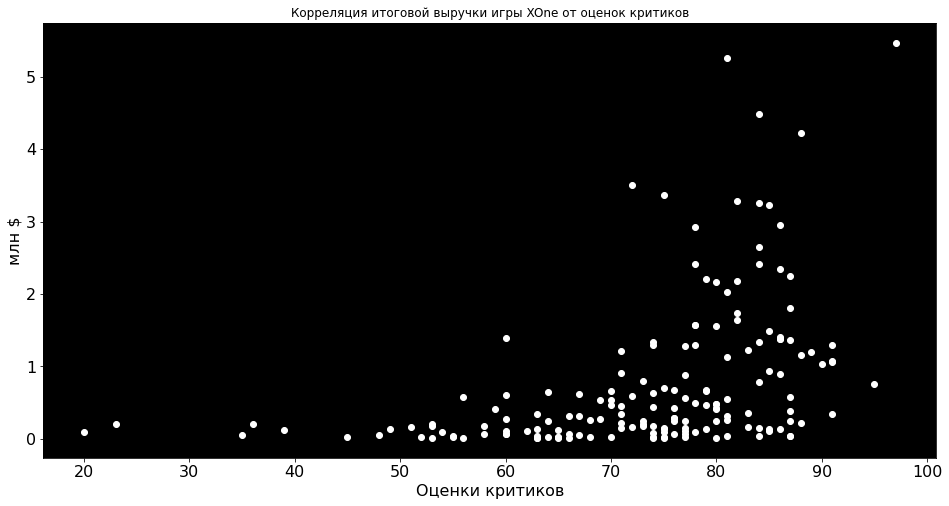

Корреляция составляет: 0.4169983280084015


In [79]:
x =  x_one['critic_score']   
y =  x_one['total_sales']    
fig, ax = plt.subplots()

ax.scatter(x, y, c = 'white')

ax.set_facecolor('black')   
ax.set_title('Корреляция итоговой выручки игры XOne от оценок критиков') 

fig.set_figwidth(16)    
fig.set_figheight(8)    

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Оценки критиков', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)

plt.show()

print('Корреляция составляет:', x_one['critic_score'].corr(x_one['total_sales']))

In [80]:
temp_df = x_one[(x_one['total_sales'] >= 0.06) & (x_one['total_sales'] <= 0.67)]
print("Без выбросов в итоговых продажах")   
print('Корреляция оценок пользователей составляет:', temp_df['user_score'].corr(temp_df['total_sales']))
print('Корреляция оценок критиков составляет:', temp_df['critic_score'].corr(temp_df['total_sales']))

Без выбросов в итоговых продажах
Корреляция оценок пользователей составляет: -0.06783242466790286
Корреляция оценок критиков составляет: 0.20312328261804166


**Итоговая выручка** так же как и на платформе `PS4` на платформе `XOne` слабо звисят от оценок пользователей, связи с этим нету, при плохой оценке игра может получить неплохую выручку в итоге.
А при оценке критиками небольшая связь прослеживается. 

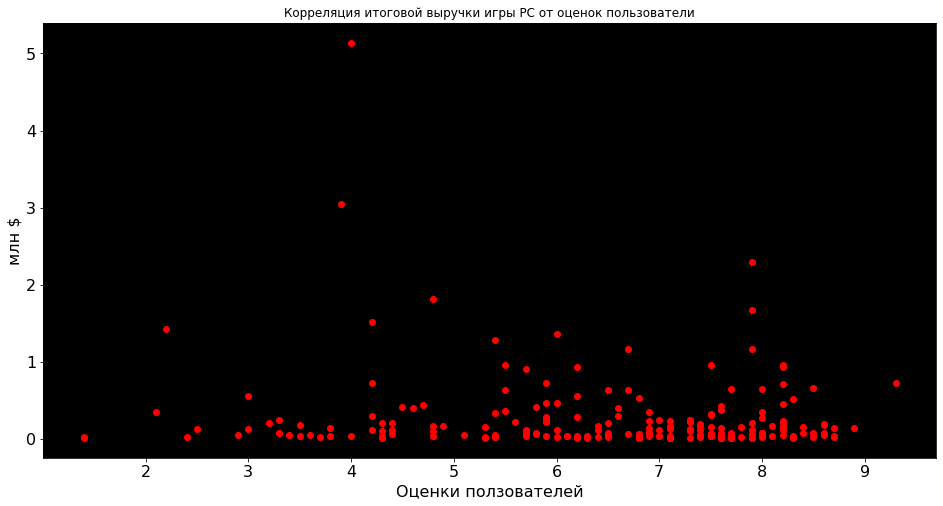

Корреляция составляет: -0.12186747630735577


In [81]:
x =  pc['user_score']   
y =  pc['total_sales']    
fig, ax = plt.subplots()

ax.scatter(x, y, c = 'red')

ax.set_facecolor('black')   
ax.set_title('Корреляция итоговой выручки игры PC от оценок пользователи') 

fig.set_figwidth(16)    
fig.set_figheight(8)    

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Оценки ползователей', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)

plt.show()

print('Корреляция составляет:', pc['user_score'].corr(pc['total_sales']))

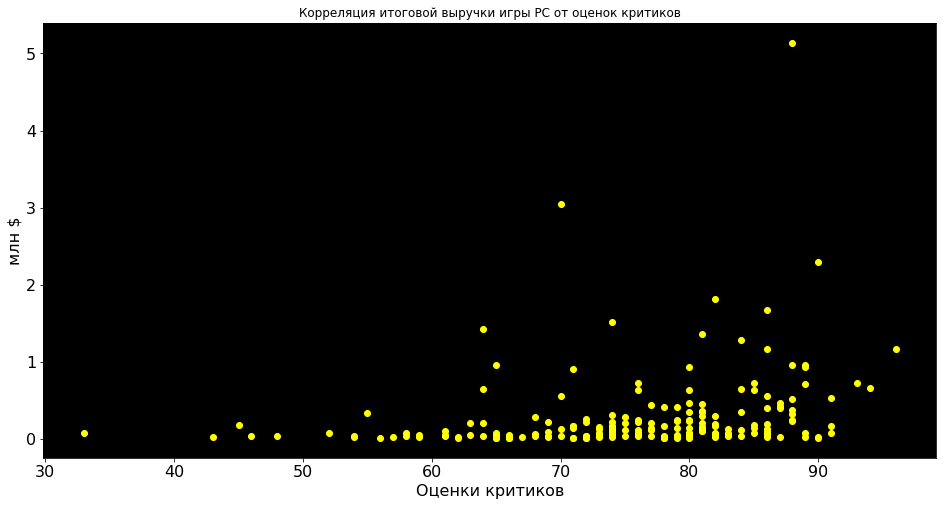

Корреляция составляет: 0.23724324311567896


In [82]:
x =  pc['critic_score']   
y =  pc['total_sales']    
fig, ax = plt.subplots()

ax.scatter(x, y, c = 'yellow')

ax.set_facecolor('black')   
ax.set_title('Корреляция итоговой выручки игры PC от оценок критиков') 

fig.set_figwidth(16)    
fig.set_figheight(8)    

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Оценки критиков', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)

plt.show()

print('Корреляция составляет:', pc['critic_score'].corr(pc['total_sales']))

In [83]:
temp_df = pc[(pc['total_sales'] >= 0.02) & (pc['total_sales'] <= 0.170)]
print("Без выбросов в итоговых продажах")   
print('Корреляция оценок пользователей составляет:', temp_df['user_score'].corr(temp_df['total_sales']))
print('Корреляция оценок критиков составляет:', temp_df['critic_score'].corr(temp_df['total_sales']))

Без выбросов в итоговых продажах
Корреляция оценок пользователей составляет: 0.0688501298479201
Корреляция оценок критиков составляет: 0.22579677691895428


**Итоговая выручка** на платформе `PC`, за 4 летний период, можно сказать с увереностью что от оценок критиков и игроков выручка игр не прослеживается

**Выводы**
* Связи между оценкой игроков и итоговой выручкой игры на 3 платформах не найдена
* Связи между оценкой критиков и итоговой выручкой игры на 3 платформах есть, но слабая у `PC`. Сильнее связь у `PS4` и `XOne`

### Распределение игр по жанрам

In [84]:
df_top3_platf.head()

,title,platform,genre,usa_sales,eu_sales,jap_sales,other_sales,user_score,critic_score,rating,year_of_release,total_sales
0,Call of Duty: Black Ops 3,PS4,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,2015,14.63
1,Grand Theft Auto V,PS4,Action,3.96,6.31,0.38,1.97,8.3,97.0,M,2014,12.62
2,FIFA 16,PS4,Sports,1.12,6.12,0.06,1.28,4.3,82.0,E,2015,8.58
3,Star Wars Battlefront (2015),PS4,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,2015,7.98
4,Call of Duty: Advanced Warfare,PS4,Shooter,2.81,3.48,0.14,1.23,5.7,83.0,M,2014,7.66


In [85]:
pivot_ganre_df = df_top3_platf.pivot_table(index='genre', values='total_sales', aggfunc=['mean', 'median'])
pivot_ganre_df.style.background_gradient('coolwarm')

,mean,median
,total_sales,total_sales
genre,,
Action,0.496780,0.140000
Adventure,0.167627,0.060000
Fighting,0.400714,0.155000
Misc,0.371591,0.165000
Platform,0.438000,0.160000
Puzzle,0.016667,0.020000
Racing,0.392542,0.100000
Role-Playing,0.578152,0.190000


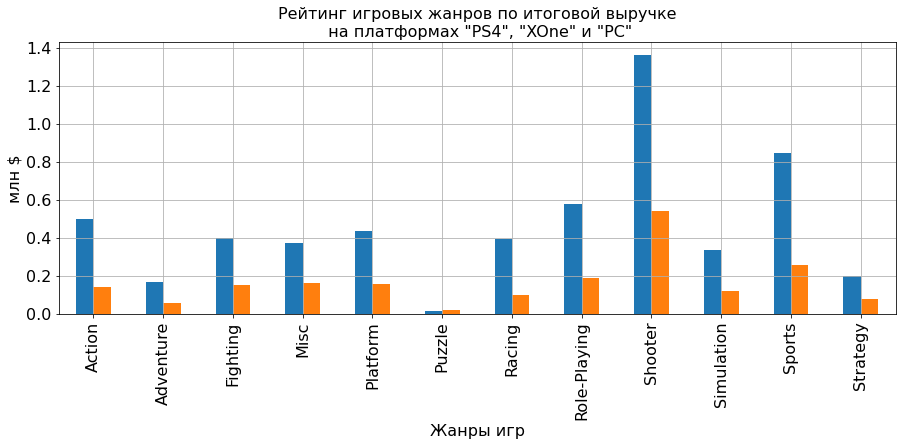

In [86]:
pivot_ganre_df.plot(kind='bar', figsize=(15, 5), grid=True, legend=False)

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Рейтинг игровых жанров по итоговой выручке\n на платформах "PS4", "XOne" и "PC"', fontsize=fontsize)
plt.xlabel('Жанры игр', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize)
plt.show()

**Вывод** 
* Самые популярные жанры с прекрасной итоговой выручкой это активные и ролевые игры, от которых игроки должны получать массу драйва и эйфории от своих действий. Их покупают распродают большим количеством копий и игр с этими жанрами выходит намного больше.
* Самые не популярные жанры, судя по итоговым продажам это интелектуальные жанры расчитаные на определенный круг игроков. Более меньший чем популярных жанров.

### Выводы
* Мы нашли признаки почему были пики по количеству выпускаемых игр 2007-2008 годах, это большое количество различных платформ, былы платформы которые доживали последние свои годы и появление новых платформ.
* Мы нашли почему произошел спад по количеству выпускаемых игр с 2010-2014. В следствии высокой конкуренции ушли с рынка большое количество платформ. Некоторые дожиыают последнее, так как заканчивается их жизненый цикл
* Взяли для анализа рынка игр актуальный период данных с 2012 года, в связи с тем что рынок подвержен быстрым изменениям в следствии короткого периода жизни платформ.
* В 2013 году на рынок выходят 2 платформы `PS4` и `XOne` которые забирают львиную долю игрового мира по годовой выручке 
* Мы узнали что оценки пользователей не зависят на итоговые продажи игры. А вот к критикам стоит всетаки прислушиваться, что скорее всего и делают игроки.
* Самые популярные жанры игр - активно-ролевые и спортивные игры
* Самые не популярные жанры у игроков - интелектуальные, где надо больше думать, составлять стретегии и просто раслабляться.

## Портрет пользователя для каждого региона

На 2015-начало 2016 года актуальные платформы на рынке по количеству выпускаемых игр являются:
* 'PS4'
* 'XOne'
* 'PC'
* 'WiiU'
* '3DS'

Расмотрим продажи игр по регионам и итоговыми продажами

In [87]:
top5_plt_sales_regions = yearly_total_sales_by_platform(list_top5_platform, actual_years_df)
top5_plt_sales_regions.style.background_gradient('coolwarm')

,total_sales
year_of_release,
2016,120.390000
2015,231.690000
2014,233.140000
2013,135.550000
2012,92.140000


In [88]:
df_top5_platf = actual_years_df

In [89]:
actual_years_df['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

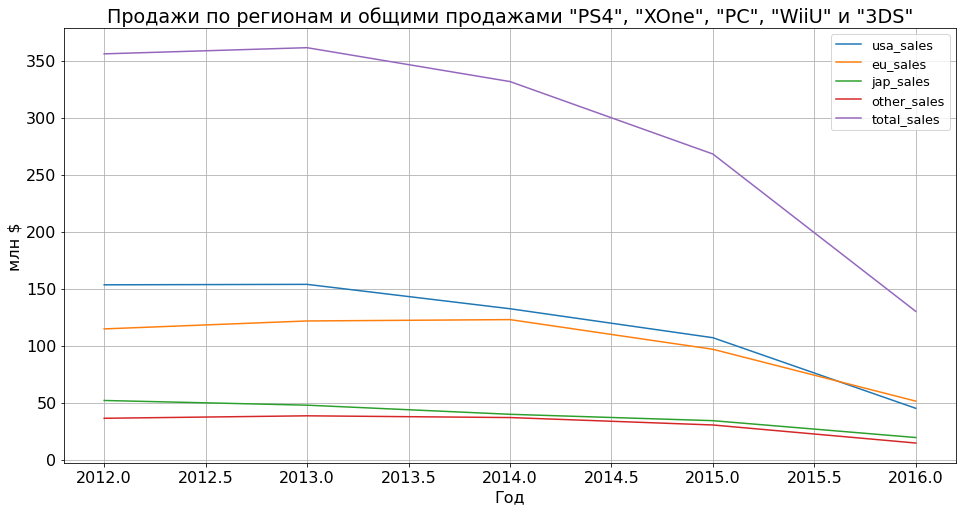

In [90]:
actual_df = df_top5_platf[[x for x in game_data.columns if 'sales' in x] + ['year_of_release']]
actual_df.groupby('year_of_release').sum().plot(figsize=(16,8), grid=True);

plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize*0.8)
plt.title('Продажи по регионам и общими продажами "PS4", "XOne", "PC", "WiiU" и "3DS"', fontsize=fontsize*1.2)
plt.xlabel('Год', fontsize=fontsize)
plt.ylabel('млн $', fontsize=fontsize);

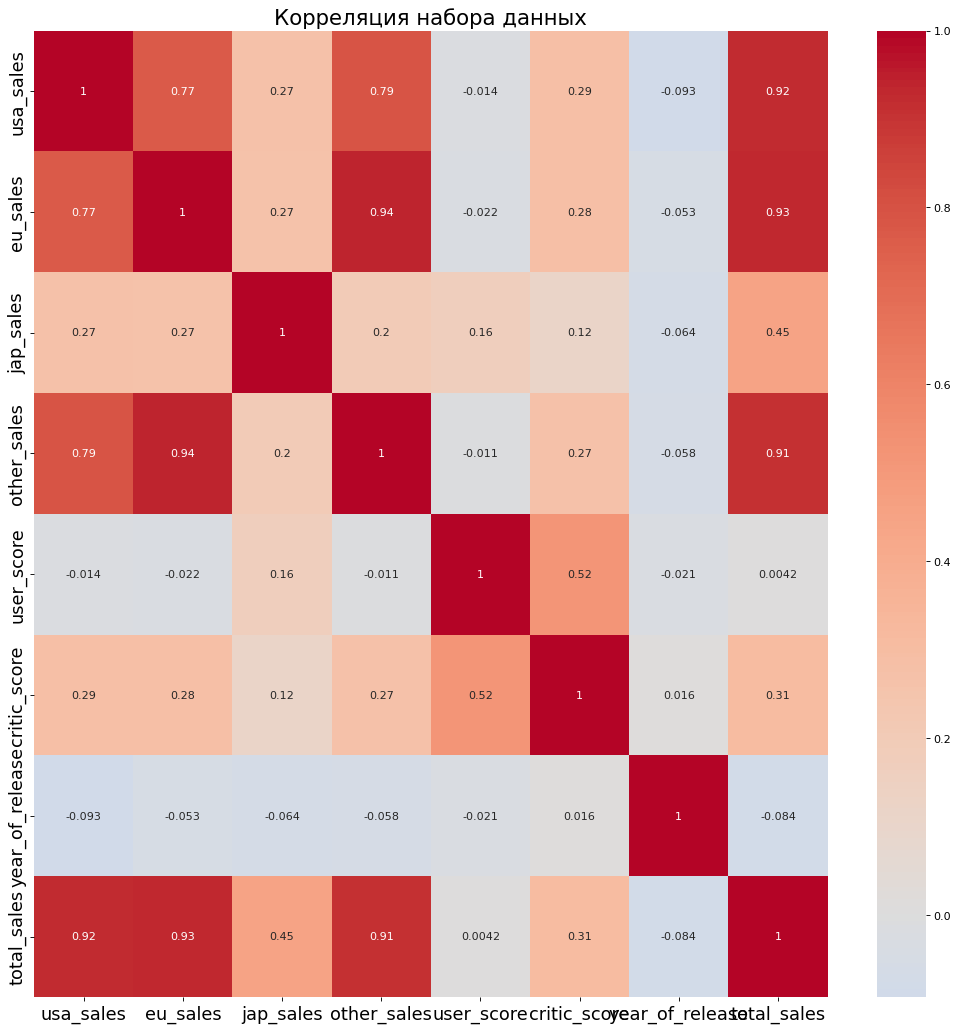

In [91]:
# Создаем таблицу и gridspec
fig = plt.figure(figsize=(16, 16), dpi= 80)
sns.heatmap(df_top5_platf.corr(), xticklabels=df_top5_platf.corr().columns, yticklabels=df_top5_platf.corr().columns, cmap='coolwarm', center=0, annot=True)

# Задаем параметры для размера надписей по осям
plt.title('Корреляция набора данных', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.show()

### Region `USA`

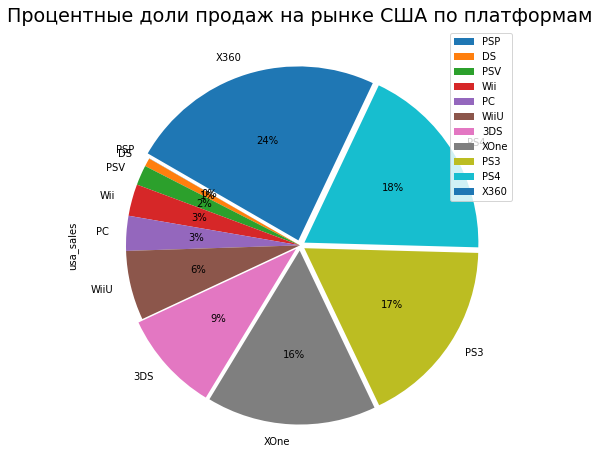

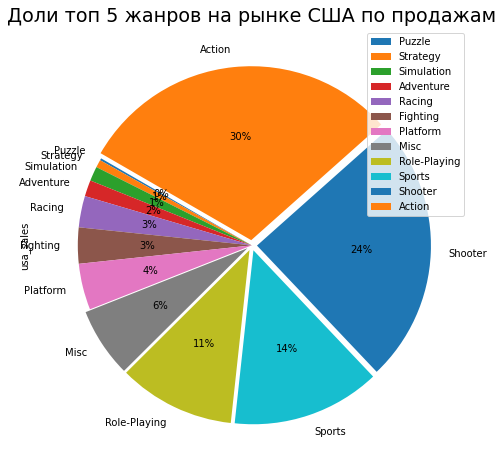

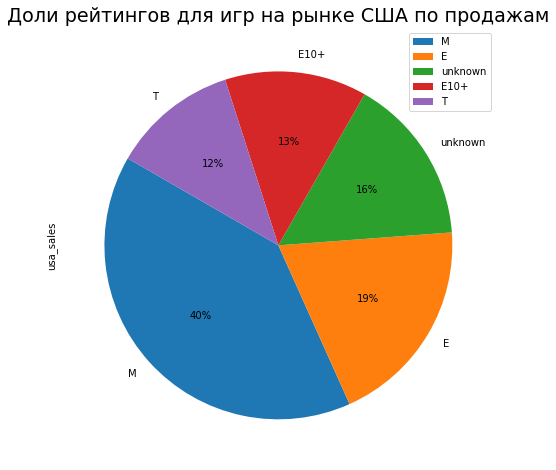

In [92]:
# График платформ
explode = [0, 0, 0, 0, 0, 0, .03, .03, .03, .03, .03]
df_top5_platf.groupby('platform').sum().sort_values('usa_sales')\
    .plot(kind='pie', y='usa_sales', 
          autopct='%1.0f%%',figsize=(8, 8), 
          explode=explode, startangle=150)
plt.title('Процентные доли продаж на рынке США по платформам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);

# График жанров
explode = [0, 0, 0, 0, 0, 0, 0, .03, .03, .03, .03, .03]
df_top5_platf.groupby('genre').sum().sort_values(by='usa_sales')\
    .plot(kind='pie', y='usa_sales',
          autopct='%1.0f%%', figsize=(8, 8),
          startangle=150, explode=explode)
plt.title('Доли топ 5 жанров на рынке США по продажам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);

# График рейтингов
df_top5_platf.groupby('rating').sum().sort_values(by='usa_sales', ascending=False).plot(kind='pie', y='usa_sales', autopct='%1.0f%%', figsize=(8, 8), startangle=150)
plt.title('Доли рейтингов для игр на рынке США по продажам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);

На рынке США по продажам преобладают консольщики
* 1 место - `X360`
* 2 место - `PS4`
* `PC`, всего 3% от всего рынка, и не входит в топ5 любимых платформ в США

**Портрет игрока для региона `USA`**
* Любит отдыхать ииграть в игры перед телевизором один или в компании друзей, с джостиком в руках, сидя на удобном диване (доля по продажам на таких платформ составляет более 50%). Основным предпочтением остается консоль предыдущего поколения `X360`, но к нему приближается `PS4`
* Или играть на портативных устройствах сидя в любом удобном месте или в находясь в транспорте, держа его в руках.
* Не очень любят играть перед компьютерами (доля этого рынка 3% по продажам)
* Играют в большинстве случаев в игры 'Action' и 'Shooter'
* Предпочтение отдают играм с возврастным рейтингом "М" и "Е", то есть игроки всех возврастов играют 

### Region `Europa`

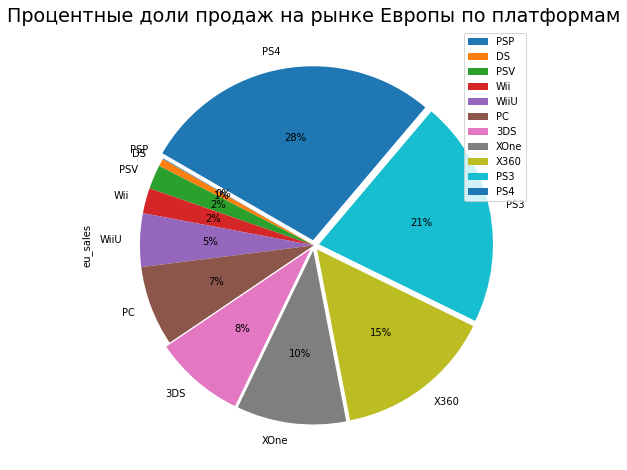

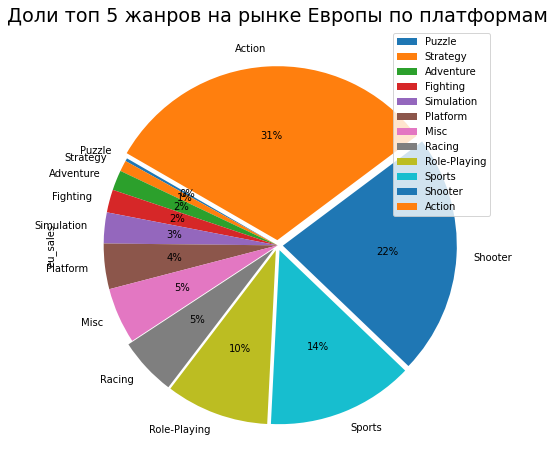

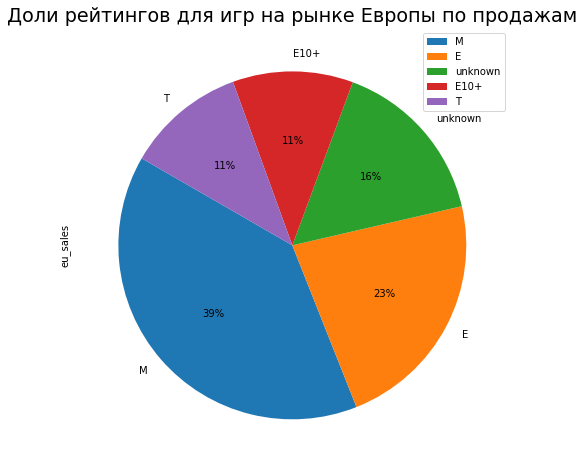

In [93]:
# График платформ
explode = [0, 0, 0, 0, 0, 0, .03, .03, .03, .03, .03]
df_top5_platf.groupby('platform').sum().sort_values('eu_sales')\
    .plot(kind='pie', y='eu_sales', 
          autopct='%1.0f%%',figsize=(8, 8), 
          explode=explode, startangle=150)

plt.title('Процентные доли продаж на рынке Европы по платформам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);

# График жанров
explode = [0, 0, 0, 0, 0, 0, 0, .03, .03, .03, .03, .03]
df_top5_platf.groupby('genre').sum().sort_values(by='eu_sales')\
    .plot(kind='pie', y='eu_sales', 
          autopct='%1.0f%%', figsize=(8, 8),
          startangle=150, explode=explode)

plt.title('Доли топ 5 жанров на рынке Европы по платформам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);

# График рейтингов
df_top5_platf.groupby('rating').sum().sort_values(by='eu_sales', ascending=False).plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(8, 8), startangle=150)
plt.title('Доли рейтингов для игр на рынке Европы по продажам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);

На рынке Европы по продажам:
* Большей популярностью пользуется консоль `PS4` и `PS3` с долей продаж 49% на двоих от всей выручки в регионе
* 3 и 4 место занимают `X360`, `XOne`, Доля рынка для 2 платформ составляет 25% рынка.
* Далее игроки вибирают `3DS`, доля на рынке 8% 
* 6 место - `PC`, 7%  

**Портрет игрока для региона `Европы`**
* Игроки этого большие поклоники консолей от от компании `SONY`
* Из 2ух первых пунктов вытекает что 75% рынка продаж игр пренадлежит консолям, Предпочитают в основном косоли 
* Иногда играют в `3DS` или `PC`
* Играют в большинстве случаев в игры 'Action' и 'Shooter', в этом регионе замекает 5ку любимых жанров `Racing`
* Предпочтение отдают играм с возврастным рейтингом "М" и "Е", то есть игроки всех возврастов играют, анологично как в США

### Region `Japan`

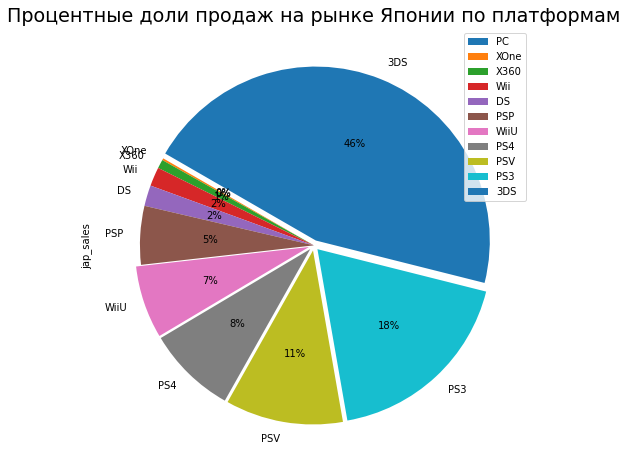

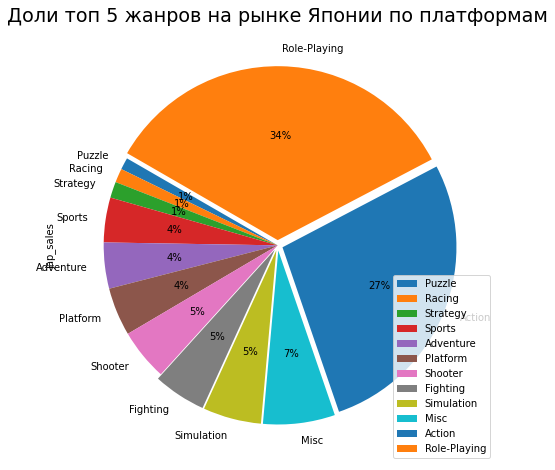

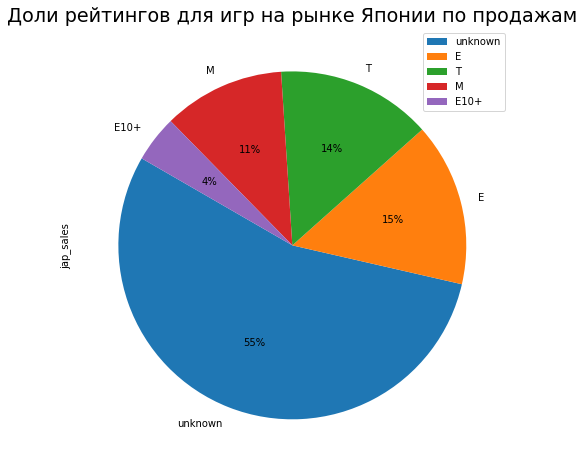

In [94]:
# График платформ
explode = [0, 0, 0, 0, 0, 0, .03, .03, .03, .03, .03]
df_top5_platf.groupby('platform').sum().sort_values('jap_sales')\
    .plot(kind='pie', y='jap_sales',
          autopct='%1.0f%%',figsize=(8, 8),
          explode=explode, startangle=150)

plt.title('Процентные доли продаж на рынке Японии по платформам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);

# График жанров
explode = [0, 0, 0, 0, 0, 0, 0, .03, .03, .03, .03, .03]
df_top5_platf.groupby('genre').sum().sort_values(by='jap_sales')\
    .plot(kind='pie', y='jap_sales',
          autopct='%1.0f%%', figsize=(8, 8),
          startangle=150, explode=explode)
plt.title('Доли топ 5 жанров на рынке Японии по платформам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);

# График рейтингов
df_top5_platf.groupby('rating').sum().sort_values(by='jap_sales', ascending=False).plot(kind='pie', y='jap_sales', autopct='%1.0f%%', figsize=(8, 8), startangle=150)
plt.title('Доли рейтингов для игр на рынке Японии по продажам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);

На рынке Японии по продажам:
* 1 место - `3DS`, c 46% на рынке
* 2 - 4 место - приставки компании `Sony`, с общим результатом 37% рынка
* 5 место - `WiiU`, всего 7% от всего рынка.

**Портрет игрока для региона `Japan`**
* Заядлые любители портатиыных платформ доля продаж составляет 64% рынка, львиную долю играют на платформе `3DS` (46%), `PSV` - с большим отставанием 11%  и `WiiU` - 11% рынка
* Иногда играет на `PS4`, `PS3`
* Не жалует платформы `XOne` и `PC`, доля продаж на этих платформах минимальны
* Игроки этого региона разительно отличаются от регинов США и Европы в предпочтении жанров игр, тут доминирущим жанром является "Role-Playing", `Action` немного отстает от него. А вот `Shoter` они не слишком жалуют всего 5% на рынке и он не входит в топ5 любимых жанров для игроков Японии.
* А вот с возврастным рейтингом есть предположения что здесь:
    * В этом регионе есть свой возврастной рейтинг
    * Также возможно в этом регионе игры выпускаются только локально, исключительно для Японии. В других регионах эти игры не продаются, а если продаются то не возможно этого отследить. И данные игры не оцениваются Американским рейтинговым агентством.
    * Лидирует возврастной рейтинг `unknow`

### Region `Other`

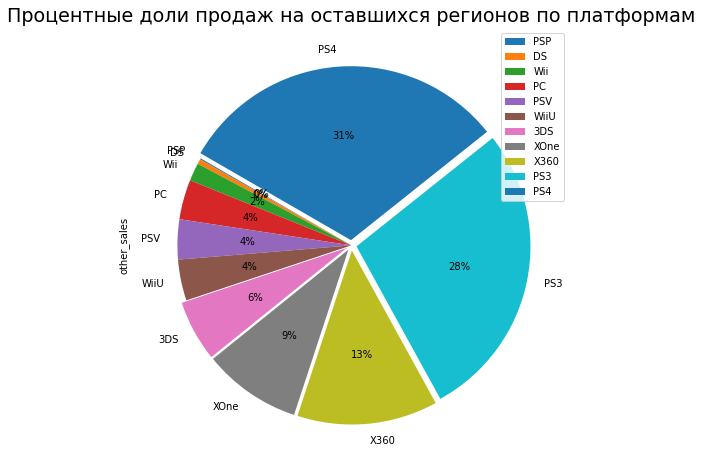

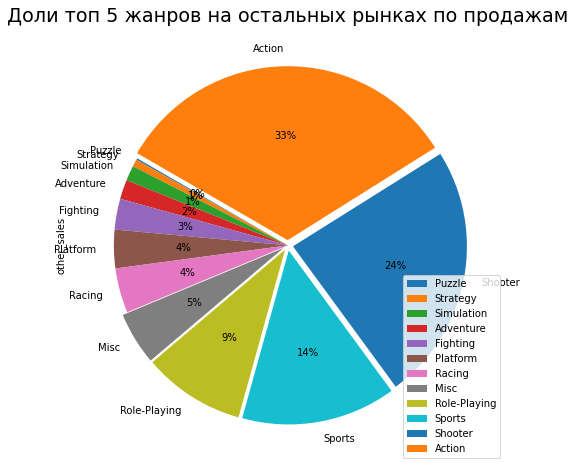

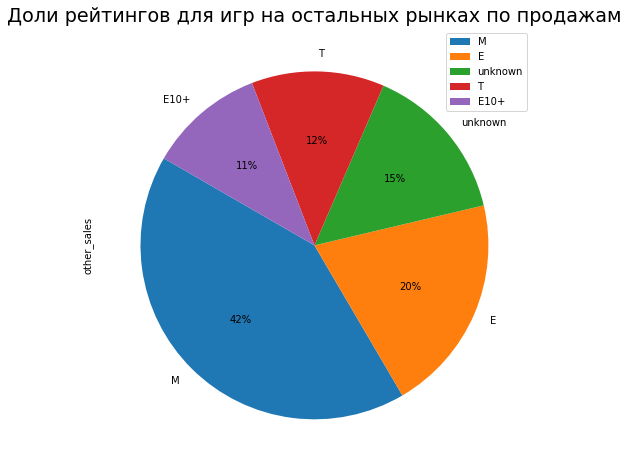

In [95]:
# График платформ
explode = [0, 0, 0, 0, 0, 0, .03, .03, .03, .03, .03]
df_top5_platf.groupby('platform').sum().sort_values('other_sales')\
    .plot(kind='pie', y='other_sales', 
          autopct='%1.0f%%', figsize=(8, 8), 
          explode=explode, startangle=150)

plt.title('Процентные доли продаж на оставшихся регионов по платформам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);

# График жанров
explode = [0, 0, 0, 0, 0, 0, 0, .03, .03, .03, .03, .03]
df_top5_platf.groupby('genre').sum().sort_values(by='other_sales')\
    .plot(kind='pie', y='other_sales', 
          autopct='%1.0f%%', figsize=(8, 8), 
          startangle=150, explode=explode)

plt.title('Доли топ 5 жанров на остальных рынках по продажам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);

# График рейтингов
df_top5_platf.groupby('rating').sum().sort_values(by='other_sales', ascending=False).plot(kind='pie', y='other_sales', autopct='%1.0f%%', figsize=(8, 8), startangle=150)
plt.title('Доли рейтингов для игр на остальных рынках по продажам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);

В других регионах по продажам:
* 1 место - `PS4`
* 2 место - `PS3`
* 3 место - `X360`

**Портрет игрока для региона `Other`**
* Портрет для оставшихся регионов Топ5 любимых платформ сооответсвуют полностью с топ% регина Епропы, только здесь еще больше предпочитают консоли в % выражении.
* Большая часть игроков оставшихся регионов предпочитают играть на `PS4`, все таки на диване удобнее - `31%` рынка по продажфм
* Пользователь этого региона скорее всего покупает платформу `PS4` и игры для нее. 
* Доля для `PC` не велика 4% от рынка, 
* Играют в большинстве случаев в игры 'Action',  'Shoote'
* Предпочтение отдают играм с возврастным рейтингом "М" и "Е", то есть игроки всех возврастов играют, анологично как в США и в Европе

### Region `World`

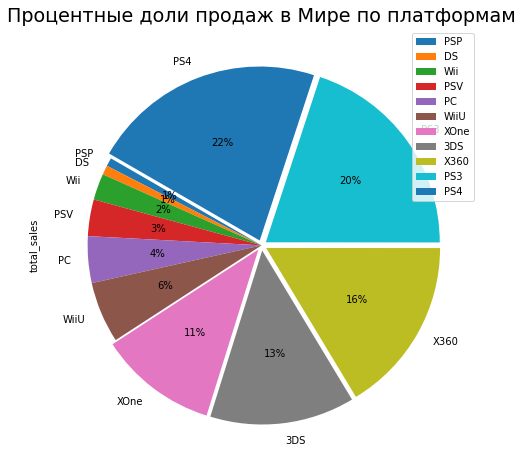

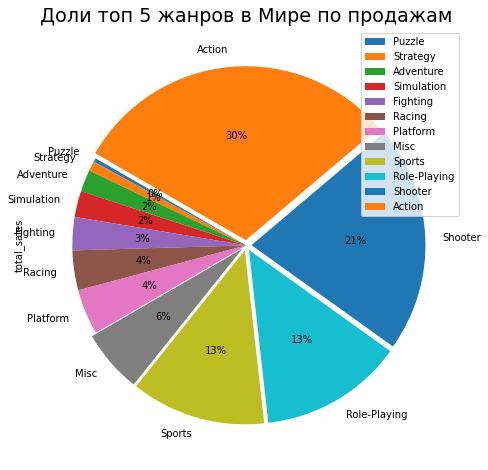

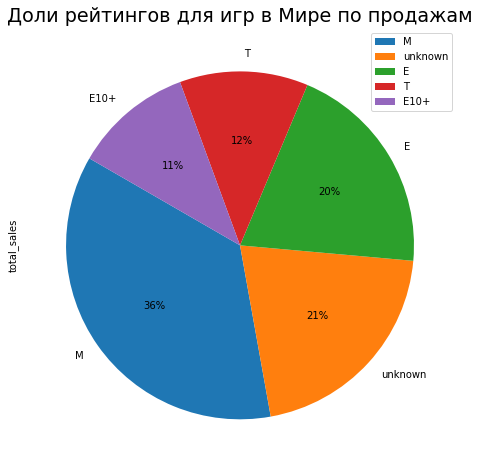

In [96]:
# График платформ
explode = [0, 0, 0, 0, 0, 0, .03, .03, .03, .03, .03]
df_top5_platf.groupby('platform').sum().sort_values('total_sales')\
    .plot(kind='pie', y='total_sales',
          autopct='%1.0f%%', figsize=(8, 8),
          explode=explode, startangle=150)

plt.title('Процентные доли продаж в Мире по платформам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

# График жанров
explode = [0, 0, 0, 0, 0, 0, 0, .03, .03, .03, .03, .03]
df_top5_platf.groupby('genre').sum().sort_values(by='total_sales')\
    .plot(kind='pie', y='total_sales',
          autopct='%1.0f%%', figsize=(8, 8),
          startangle=150, explode=explode)
plt.title('Доли топ 5 жанров в Мире по продажам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);

# График рейтингов
df_top5_platf.groupby('rating').sum().sort_values(by='total_sales', ascending=False).plot(kind='pie', y='total_sales', autopct='%1.0f%%', figsize=(8, 8), startangle=150)
plt.title('Доли рейтингов для игр в Мире по продажам', fontsize=fontsize*1.2)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize);

**Подведем итоги**

* В США поддерживают больше старшую консоль `X360`, в Японии большие любители `3DS`, все оставшиеся регионы вместе  взятые очень схожи с предпочтениями с Европы
* Игрокам очень по нраву новая консоль `PS4`, по показателям она догоняет лидеров в своих регионах. Игры для `XОne` пока не могут похвастаться выдающимися показателями, но везде входит в топ5 любимых платформ 
* Из-за японских портативных любителей игр `3DS` выходит на уверенное 2 место по продажам или 21% от всего рынка
* Доля продаж игр для `PC` во всех регионах незначительна. Можно сказать что персональный компьютер не является основной платформой для развлечения и отдыха для игроков.
* Большинство регионов играют в 'Action', кроме Японии там больше предпочитают японский стиль `RPG`, в остальном предпочтения схожи в предпочтении по жанрам в регионах
* Из-за больших потерь в данных получется что хорошо продаются с рейтингом "М" (от 17 лет), в Японии лидируют свои игры с со своим возврастным рейтингом поэтому получается скос в к рейтингу "unknow". И тройку лидеров замыкает игры с рейтингом "E", что значит в игры начинают играть с пелёнок.

### Топ 5 самых популярных жанров
Самые популярные жанры топ-5:

In [97]:
(
    actual_years_df.pivot_table(index='genre', values='total_sales', aggfunc='mean')
    .sort_values('total_sales', ascending=False)
    .head().style.background_gradient('coolwarm')
)

,total_sales
genre,
Shooter,1.296723
Platform,0.717647
Sports,0.678127
Role-Playing,0.521081
Racing,0.465217


In [98]:
(
    actual_years_df.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values('total_sales', ascending=False)
    .head().style.background_gradient('coolwarm')
)

,total_sales
genre,
Shooter,0.440000
Sports,0.240000
Platform,0.210000
Role-Playing,0.140000
Racing,0.140000


Как мы видели ранее то пользвователи с большим отрывом предпочитают актиыные игры в отличие от интелектуальных. То есть игроки предпочитают оставлять свои эмоции и получать массу удовольствия от игр жанра `"Shooter"`. 

Болеют за свои команды в спортивных играх и сами занимаются этими же спортивными играми перед мониторами или экранами. 

Или попытаться совместить активность и интелектульные свои возможности в играх `RPG`, хотя отставние в этом жанре от `"Shooter"` практически в 2 раза по продажам

И замыкает наш рейтинг `"Racing	"`, когда уже устали стрелять. 

## Проверка гипотез
    
**Сформулируем статические гипотезы:**
1. Средние пользовательские рейтинги платформ `XOne` и `PC` одинаковые;
1. Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы `XOne` и `PC`;
Какой критерий применили для проверки гипотез и почему.

### Гипотеза об оценках на  платформах `XOne` и `PC`

* `H₀`: Средние пользовательские оценки равны для платформ `XOne` и `PC`;
* `H₁`: Средние пользовательские оценки не равны для выбранных платформ.

Зададим пороговое значение `alpha` общепринятое значение $0.05$

In [99]:
# Выделим отдельные выборки оценок по платформам
x_one_user_score = x_one['user_score']
pc_user_core = pc['user_score']

alpha = .05 # уровень значимости 5%

results = st.ttest_ind(x_one_user_score, pc_user_core, equal_var=False, nan_policy='omit')

if results.pvalue < alpha:
    print('Отвергаем нулевую гепотезу')
else:
    print(f'Отвергнуть нулевую гипотезу не получилось, p_value = {results.pvalue}')

Отвергнуть нулевую гипотезу не получилось, p_value = 0.5489537965134426


In [100]:
print(f'Средние значения оценок игроков платформы "PC": {pc_user_core.mean():.2f}')
print(f'Средние значения оценок игроков платформы "XOne": {x_one_user_score.mean():.2f}')
print(results)

Средние значения оценок игроков платформы "PC": 6.43
Средние значения оценок игроков платформы "XOne": 6.52
Ttest_indResult(statistic=0.5998585993590302, pvalue=0.5489537965134426)


**Выводы:**  
Были собраны оценки пользователей за последние 4 года (2012-2016 года)с хвостиком. Хоть консоль "XOne", очень молода по сравненению "PC", игры для этих платформ выходят одни и теже, эксклюзивов для какой-то одной из с Топовой популярностью не было. При статической погрешности в 5% можно сказать что Нулевую гипотезу стоим в дальнейшем проверять экспериментально, с утверждением что **Средние пользовательские оценки игр равны для платформ `XOne` и `PC`.**

### Гипотеза о жанрах `Action` и `Sports`

* `H₀`: Средние пользовательские оценки равны для жанров `Action` и `Sports`;
* `H₁`: Средние пользовательские оценки для `Action`отличаются от `Sports`.

Зададим пороговое значение `alpha` общепринятое значение $0.05$

In [101]:
action_user_score = actual_years_df.query('genre == "Action"')['user_score']
sports_user_score = actual_years_df.query('genre == "Sports"')['user_score']

alpha = .05

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False, nan_policy='omit')

print(f'p-значение:{results.pvalue:.20f}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print(f'Отвергнуть нулевую гипотезу не получилось, p_value = {results.pvalue}')

p-значение:0.00000000000000000006
Отвергаем нулевую гипотезу


In [102]:
print(f'Средние значения оценок игроков для жанра "Action": {action_user_score.mean():.2f}')
print(f'Средние значения оценок игроков для жанра "Sports": {sports_user_score.mean():.2f}')
print(results)

Средние значения оценок игроков для жанра "Action": 6.83
Средние значения оценок игроков для жанра "Sports": 5.46
Ttest_indResult(statistic=9.863487132322385, pvalue=5.989458066467624e-20)


**Выводы:**  
* Были собраны оценки пользователей за последние 4 года (2012-2016 года)с хвостиком. 
* Нулевая гипотеза не потдвердилась, но вопрос гипотезы стоял в том что они отличаются, актуальной гипотезой становится Альтернативная. Для игр с жанром "Action" ставят выше, чем для "Sports".
Приходим к выводу что **Средние пользовательские оценки для Action отличаются от Sports**

## Выводы об игровой индустрии и прогнозы на будущее

**Выводы**
* Мы увидели как рождаются Легенды игровой индустрии и также их закат. В данный момент жизненый цикл составляет  лет для новой платформы
* Платформа Персональных компютеров никогда не уйдет с рынка продаж игр, эта платформа является долгожителем на этом рынке.
* Портреты игроков для каждого регионов разняться между собой. 
    * В США игроки обладают каждой из новых вышедших платформ и персональным компютером. Любимый жанр "Action". И им не мешает ограничение рейтинга `ESRB`, лидируют игры с рейтингом 'M' 
    * В Японии заядлые любители одной платформы `3DS`. Также любят играть в игры с жанром "Action". В Японии игры скорее всего оценивают другим рейтингом потому что игры здесь преобладают с оценкой 'unknow' 
    * Европе игрок скорее является обладателями платформ `PS4`, `PC`. Любимый жанр "Action". И им не мешает ограничение рейтинга `ESRB`, лидируют игры с рейтингом 'M'
    * По всем оставшимся регионам игроки выбирают между `PS4` и `XOne`, также обладают персональным компьютером. Любимый жанр "Action". И им не мешает ограничение рейтинга `ESRB`, лидируют игры с рейтингом 'M'
* Гипотеза что оценка игроков на  платформах `XOne` и `PC` имеет под собой все основания и требует дальнейшего изучения
* Гипотеза что оценка игроков в жанрах `Action` и `Sports` различаются имеет под собой все оснавния на жизнь, они точно не одинаковы.

**Прогнозы на 2016-2017 год**
* В 2016-2017 лидерами по продажам будут `PS4` и `XOne`. Но лидером с большим отрывом будет `PS4`.
* В этот период времени скорее всего завершать свой цикл производства для платформ  `3DS`, `WiiU`. Для региона Японии `3DS`, останется основной игровой платформой, если не появится на рынке новая удобная портативная консоль и с большим количеством игр для нее, хотя в других регионах продажи для этой платформы должны будут снижаться.
* На смену старым консолям стоит ожидать релизы новых консолей, возможно портирование старых игр для новых платформ. "Классика" никогда не умрет в игровом мире.
* Весь мир будет скорее ожидать новые игры в жанре `Action`.

**О наборе данных**
* Хотелось бы побольше контроля в оценках игроков и критиков. По каким то причинам в набор не попадают их значения. Или возможно игры однодневки на которые игроки с критиками не обращают внимания, и не ставят оценки.
* В Японии скорее всего другой возрасной рейтинг для игр, возможно стоит его добавить к этому набру данных